<a href="https://colab.research.google.com/github/SuvinPython/NLP_projet/blob/main/Projet1nlp_suvin_charlie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction**

**Projet réalisé par :**

**1.   Charlie MARTIN**

**2.   Suvin SASIKUMAR**

**Nous somme tous les deux, étudiants en DIA3**


**Subjet : FOOD2VEC**

**Context :**

OpenFoodFacts can be considerated as a wikipedia for food!
The goal of OpenFoodFacts is to share with everyone a maximum of informations on food products. 
It contains more than 2.5 millions products but maybe all products are not
perfectly described...
Mainly, for a product, we can find the list of ingredients, nutrition facts and food categories.


# **PARTIE A :  MAP OF INGREDIENTS**

**Description of the step :**

**1.   Vectorize list of ingredients in order to learn a word2Vec model.**

**2.   Once the model learned, you have to create a map of ingredients** 

## **I) Import all module needed for the projet**

In [1]:
#Basic Modules
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
# Modules for NLP
import nltk
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter
#from langdetect import detect
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
#tokenizer = TreebankWordTokenizer()

## **II) Import the Dataset**


1.   We filtered the initial dataset(of openfoodfacts) with only product that are sold in usa. The initial dataset had almos 2,5 millions of food products, and this was too much size for our computer ( have a look at our report to understand of we proceed)
2.   We exported the filtered dataset as "dataset_clean_fr" and then we upload it on google collab, to work on it. 



In [2]:
pd.set_option('display.max_columns', None)
drive.mount('/content/drive')
file = pd.read_csv("/content/drive/MyDrive/dataset_clean_en.csv")
file.shape

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,8,14,23,24,28,29,30,32,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(537371, 196)

In [3]:
file.head(1)

code                                                url creator   created_t  \
0    1  http://world-en.openfoodfacts.org/product/0000...     inf  1634745456   

       created_datetime  last_modified_t last_modified_datetime product_name  \
0  2021-10-20T15:57:36Z       1634745530   2021-10-20T15:58:50Z    hyde icon   

  abbreviated_product_name generic_name quantity packaging packaging_tags  \
0                      NaN          NaN      NaN       NaN            NaN   

  packaging_en packaging_text brands brands_tags categories categories_tags  \
0          NaN            NaN    NaN         NaN        NaN             NaN   

  categories_en origins origins_tags origins_en manufacturing_places  \
0           NaN     NaN          NaN        NaN                  NaN   

  manufacturing_places_tags labels labels_tags labels_en emb_codes  \
0                       NaN    NaN         NaN       NaN       NaN   

  emb_codes_tags first_packaging_code_geo  cities cities_tags purchase_places  \
0            NaN                      NaN     NaN         NaN             NaN   

  stores         countries    countries_tags   countries_en  \
0    NaN  en:United States  en:united-states  United States   

                                    ingredients_text  \
0  beta alanine, creatine hcl, ancient peat & app...   

                                    ingredients_tags  \
0  en:beta-alanine,en:creatine-hcl,en:ancient-pea...   

                           ingredients_analysis_tags allergens  allergens_en  \
0  en:palm-oil-content-unknown,en:vegan-status-un...       NaN           NaN   

  traces traces_tags traces_en serving_size  serving_quantity  no_nutriments  \
0    NaN         NaN       NaN          NaN               NaN            NaN   

   additives_n  additives                           additives_tags  \
0          5.0        NaN  en:e296,en:e330,en:e552,en:e950,en:e955   

                                        additives_en  nutriscore_score  \
0  E296 - Malic acid,E330 - Citric acid,E552 - Ca...               NaN   

  nutriscore_grade  nova_group pnns_groups_1 pnns_groups_2 food_groups  \
0              NaN         4.0       unknown       unknown         NaN   

  food_groups_tags food_groups_en  \
0              NaN            NaN   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-complet...   

                                         states_tags  \
0  en:to-be-completed,en:nutrition-facts-complete...   

                                           states_en brand_owner  \
0  To be completed,Nutrition facts completed,Ingr...         NaN   

   ecoscore_score ecoscore_grade nutrient_levels_tags  product_quantity owner  \
0             NaN        unknown                  NaN               NaN   NaN   

  data_quality_errors_tags  unique_scans_n popularity_tags  completeness  \
0                      NaN             NaN             NaN           0.3   

   last_image_t last_image_datetime main_category main_category_en image_url  \
0           NaN                 NaN           NaN              NaN       NaN   

  image_small_url image_ingredients_url image_ingredients_small_url  \
0             NaN                   NaN                         NaN   

  image_nutrition_url image_nutrition_small_url  energy-kj_100g  \
0                 NaN                       NaN             NaN   

   energy-kcal_100g  energy_100g  energy-from-fat_100g  fat_100g  \
0               NaN          NaN                   NaN       NaN   

   saturated-fat_100g  -butyric-acid_100g  -caproic-acid_100g  \
0                 NaN                 NaN                 NaN   

   -caprylic-acid_100g  -capric-acid_100g  -lauric-acid_100g  \
0                  NaN                NaN                NaN   

   -myristic-acid_100g  -palmitic-acid_100g  -stearic-acid_100g  \
0                  NaN                  NaN                 NaN   

   -arachidic-acid_100g  -behenic-acid_100g  -lignoceric-acid_100g  \
0     

## **III) Data Processing**

**1. The dataset has now 537 371 rows and 196 columns.**

**2. Let's have a look if there is any null values in the  columns we need. We only selected 3 column in the beginning :**
 **'code','product_name','ingredients_tags'**


In [4]:
columns = ['code','product_name','ingredients_tags']
for col in columns:
    res = (file[col].isnull().sum() / len(file)) * 100
    res = round(res,2)
    print(f'   - {col} : {res}%')

   - code : 0.0%
   - product_name : 0.93%
   - ingredients_tags : 39.43%


**3. We can now start data clean, by dropping na values in ingredients_tags and product_name**

In [5]:
file_clean = file[~file["ingredients_tags"].isnull()]
file_clean = file_clean[~file_clean["product_name"].isnull()]
print(file_clean.shape)
file_clean.head(1)

(324709, 196)


code                                                url creator   created_t  \
0    1  http://world-en.openfoodfacts.org/product/0000...     inf  1634745456   

       created_datetime  last_modified_t last_modified_datetime product_name  \
0  2021-10-20T15:57:36Z       1634745530   2021-10-20T15:58:50Z    hyde icon   

  abbreviated_product_name generic_name quantity packaging packaging_tags  \
0                      NaN          NaN      NaN       NaN            NaN   

  packaging_en packaging_text brands brands_tags categories categories_tags  \
0          NaN            NaN    NaN         NaN        NaN             NaN   

  categories_en origins origins_tags origins_en manufacturing_places  \
0           NaN     NaN          NaN        NaN                  NaN   

  manufacturing_places_tags labels labels_tags labels_en emb_codes  \
0                       NaN    NaN         NaN       NaN       NaN   

  emb_codes_tags first_packaging_code_geo  cities cities_tags purchase_places  \
0            NaN                      NaN     NaN         NaN             NaN   

  stores         countries    countries_tags   countries_en  \
0    NaN  en:United States  en:united-states  United States   

                                    ingredients_text  \
0  beta alanine, creatine hcl, ancient peat & app...   

                                    ingredients_tags  \
0  en:beta-alanine,en:creatine-hcl,en:ancient-pea...   

                           ingredients_analysis_tags allergens  allergens_en  \
0  en:palm-oil-content-unknown,en:vegan-status-un...       NaN           NaN   

  traces traces_tags traces_en serving_size  serving_quantity  no_nutriments  \
0    NaN         NaN       NaN          NaN               NaN            NaN   

   additives_n  additives                           additives_tags  \
0          5.0        NaN  en:e296,en:e330,en:e552,en:e950,en:e955   

                                        additives_en  nutriscore_score  \
0  E296 - Malic acid,E330 - Citric acid,E552 - Ca...               NaN   

  nutriscore_grade  nova_group pnns_groups_1 pnns_groups_2 food_groups  \
0              NaN         4.0       unknown       unknown         NaN   

  food_groups_tags food_groups_en  \
0              NaN            NaN   

                                              states  \
0  en:to-be-completed, en:nutrition-facts-complet...   

                                         states_tags  \
0  en:to-be-completed,en:nutrition-facts-complete...   

                                           states_en brand_owner  \
0  To be completed,Nutrition facts completed,Ingr...         NaN   

   ecoscore_score ecoscore_grade nutrient_levels_tags  product_quantity owner  \
0             NaN        unknown                  NaN               NaN   NaN   

  data_quality_errors_tags  unique_scans_n popularity_tags  completeness  \
0                      NaN             NaN             NaN           0.3   

   last_image_t last_image_datetime main_category main_category_en image_url  \
0           NaN                 NaN           NaN              NaN       NaN   

  image_small_url image_ingredients_url image_ingredients_small_url  \
0             NaN                   NaN                         NaN   

  image_nutrition_url image_nutrition_small_url  energy-kj_100g  \
0                 NaN                       NaN             NaN   

   energy-kcal_100g  energy_100g  energy-from-fat_100g  fat_100g  \
0               NaN          NaN                   NaN       NaN   

   saturated-fat_100g  -butyric-acid_100g  -caproic-acid_100g  \
0                 NaN                 NaN                 NaN   

   -caprylic-acid_100g  -capric-acid_100g  -lauric-acid_100g  \
0                  NaN                NaN                NaN   

   -myristic-acid_100g  -palmitic-acid_100g  -stearic-acid_100g  \
0                  NaN                  NaN                 NaN   

   -arachidic-acid_100g  -behenic-acid_100g  -lignoceric-acid_100g  \
0     

**4. We keep only the columns we need**

In [6]:
ingredients_tags = file_clean[['code','product_name','ingredients_tags']].copy()
ingredients_tags.head(1)

code product_name                                   ingredients_tags
0    1    hyde icon  en:beta-alanine,en:creatine-hcl,en:ancient-pea...

In [7]:
ingredients_tags['ingredients_tags'][3]

'en:hazelnut,en:nut,en:tree-nut,en:cashew-nuts,en:walnuts-almonds,en:sunflower-oil,en:oil-and-fat,en:vegetable-oil-and-fat,en:vegetable-oil,en:sea-salt,en:salt'

**4. We have to clean the columns ingredient_tags, by selecting only french words.  To do so, we are going to do nlp**

In [8]:
# we select only words that in the "fr" lisst
def clean(row):
  row = row.split(",")
  i=[i.split(":")[1] for i in row if i.split(":")[0]=="en"]
  if len(i)!=0:
    return i
  else:
    return None
    
def clean_df (col_name,data):
  data[col_name] = data[col_name].astype('str')
  data[col_name]=data[col_name].apply(clean)
  return data

In [9]:
english_ingredients_tags=clean_df("ingredients_tags",ingredients_tags)
english_ingredients_tags['ingredients_tags'][3]

['hazelnut',
 'nut',
 'tree-nut',
 'cashew-nuts',
 'walnuts-almonds',
 'sunflower-oil',
 'oil-and-fat',
 'vegetable-oil-and-fat',
 'vegetable-oil',
 'sea-salt',
 'salt']

In [10]:
for col in columns:
    res = (english_ingredients_tags[col].isnull().sum() / len(english_ingredients_tags)) * 100
    res = round(res,2)
    print(f'   - {col} : {res}%')

   - code : 0.0%
   - product_name : 0.0%
   - ingredients_tags : 0.09%


**5. With this procressing, we lost a lot row, because we had product sold in france that were made from another country. The list of ingredient were also not in french. With our cleaning we have 37% of nan value and we are going to drop them**

In [11]:
english_ingredients_tags = english_ingredients_tags[english_ingredients_tags['ingredients_tags'].notna()]
print(english_ingredients_tags.shape)
print(english_ingredients_tags['ingredients_tags'][3])
english_ingredients_tags.head(1)

(324417, 3)
['hazelnut', 'nut', 'tree-nut', 'cashew-nuts', 'walnuts-almonds', 'sunflower-oil', 'oil-and-fat', 'vegetable-oil-and-fat', 'vegetable-oil', 'sea-salt', 'salt']


code product_name                                   ingredients_tags
0    1    hyde icon  [beta-alanine, creatine-hcl, ancient-peat-and-...

**6. Now we have to drop every useless caracters**

In [12]:
english_ingredients_tags['ingredients_tags'] = english_ingredients_tags['ingredients_tags'].map(lambda x : str(x).lower())
english_ingredients_tags['ingredients_tags'] =english_ingredients_tags['ingredients_tags'].map(lambda x :re.sub("\d+", "", x))
english_ingredients_tags['ingredients_tags']  = english_ingredients_tags['ingredients_tags'] .map(lambda x :re.sub(r'[!]', '', x))
english_ingredients_tags['ingredients_tags']  = english_ingredients_tags['ingredients_tags'] .map(lambda x :re.sub(r'[•]', '', x))
english_ingredients_tags['ingredients_tags']  = english_ingredients_tags['ingredients_tags'] .map(lambda x :re.sub(r'[/]', '', x))
english_ingredients_tags['ingredients_tags']  = english_ingredients_tags['ingredients_tags'] .map(lambda x :re.sub(r'[[]', '', x))
english_ingredients_tags['ingredients_tags'] = english_ingredients_tags['ingredients_tags'] .map(lambda x :re.sub(r'[]]', '', x))
english_ingredients_tags['ingredients_tags']  = english_ingredients_tags['ingredients_tags'] .map(lambda x :re.sub(r'[?]', '', x))
english_ingredients_tags['ingredients_tags']  = english_ingredients_tags['ingredients_tags'] .map(lambda x :re.sub(r'[-]', ' ', x))
english_ingredients_tags['ingredients_tags']  = english_ingredients_tags['ingredients_tags'] .map(lambda x :re.sub(r'[,]', '', x))
english_ingredients_tags['ingredients_tags']  = english_ingredients_tags['ingredients_tags'] .map(lambda x :re.sub(r"[']", ' ', x))

<ipython-input-12-3cb6cb64168a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_ingredients_tags['ingredients_tags'] = english_ingredients_tags['ingredients_tags'].map(lambda x : str(x).lower())
<ipython-input-12-3cb6cb64168a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_ingredients_tags['ingredients_tags'] =english_ingredients_tags['ingredients_tags'].map(lambda x :re.sub("\d+", "", x))
<ipython-input-12-3cb6cb64168a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [13]:
pd.options.display.max_colwidth = 20000
english_ingredients_tags['ingredients_tags'][3]

' hazelnut   nut   tree nut   cashew nuts   walnuts almonds   sunflower oil   oil and fat   vegetable oil and fat   vegetable oil   sea salt   salt '

**7. We can now tokenize the list of word**

In [14]:
english_ingredients_tags['ingredient_tokenize'] = english_ingredients_tags['ingredients_tags'].map(lambda x : x.split(' '))

<ipython-input-14-05423918fd30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_ingredients_tags['ingredient_tokenize'] = english_ingredients_tags['ingredients_tags'].map(lambda x : x.split(' '))


**8. We keed only words that have more than 2 caractere**

In [15]:
english_ingredients_tags['ingredient_tokenize'] = english_ingredients_tags['ingredient_tokenize'].map(lambda x : [y for y in list(x)  if len(y)>2])

<ipython-input-15-0bdcfa9b9e4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_ingredients_tags['ingredient_tokenize'] = english_ingredients_tags['ingredient_tokenize'].map(lambda x : [y for y in list(x)  if len(y)>2])


In [16]:
print(english_ingredients_tags.shape)
english_ingredients_tags['ingredient_tokenize'][3]

(324417, 4)


['hazelnut',
 'nut',
 'tree',
 'nut',
 'cashew',
 'nuts',
 'walnuts',
 'almonds',
 'sunflower',
 'oil',
 'oil',
 'and',
 'fat',
 'vegetable',
 'oil',
 'and',
 'fat',
 'vegetable',
 'oil',
 'sea',
 'salt',
 'salt']

**12. Here you will see an observation of the ingredient "steak" and how it is linked in the product name**

In [17]:
liste_produits = english_ingredients_tags.product_name.unique()

In [18]:
i=0
for produit in liste_produits:
    if("steak" in produit):
        i=i+1
        print("i =", i)
        print("produit = ",produit)

i = 1
produit =  Kroger, grill time, steak seasoning
i = 2
produit =  Angus beef ribeye steak
i = 3
produit =  Angus beef strip steak
i = 4
produit =  Angus beef flat iron steak
i = 5
produit =  Organic beef strip steak
i = 6
produit =  Beef shaved steak, beef
i = 7
produit =  Bison strip loin steak
i = 8
produit =  Grill time steak rub & seasoning
i = 9
produit =  kroger steak fries
i = 10
produit =  Bourbon & balsamic steak sauce
i = 11
produit =  Bison tenderloin steak
i = 12
produit =  Ribeye steak
i = 13
produit =  Roundy's, steak sauce
i = 14
produit =  Soup, chunky steak & potato
i = 15
produit =  Spartan, steak sauce
i = 16
produit =  Spartan, steak & chop marinade, garlic and cracked black pepper
i = 17
produit =  Steak seasoning, steak
i = 18
produit =  Steak sauce, steak
i = 19
produit =  57 steak sauce
i = 20
produit =  Country style steak fries
i = 21
produit =  Sweet baby ray's, steakhouse sauce & marinade
i = 22
produit =  Green pepper steak tender beef, peppers & onions

**13. We drop all the words we don't need in english (stops words)**

In [19]:
# in case there is still english words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
english_ingredients_tags['ingredient_tokenize'] = english_ingredients_tags["ingredient_tokenize"].map(lambda x : [y for y in list(x) if  y not in stop_words])
english_ingredients_tags['ingredient_tokenize'][3]

<ipython-input-20-ee3a6b838094>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_ingredients_tags['ingredient_tokenize'] = english_ingredients_tags["ingredient_tokenize"].map(lambda x : [y for y in list(x) if  y not in stop_words])


['hazelnut',
 'nut',
 'tree',
 'nut',
 'cashew',
 'nuts',
 'walnuts',
 'almonds',
 'sunflower',
 'oil',
 'oil',
 'fat',
 'vegetable',
 'oil',
 'fat',
 'vegetable',
 'oil',
 'sea',
 'salt',
 'salt']

In [21]:
english_ingredients_tags.shape

(324417, 4)

## **OPTIONNAL : we save the dataframe with all the first processing**

In [22]:
english_ingredients_tags.to_csv('/content/drive/MyDrive/english_ingredients_tags.csv',index=False)
english_ingredients_tags.shape

(324417, 4)

# **Data Processing continuation**

In [23]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/english_ingredients_tags3.csv")
df.head(1)
# we add the column main_category : we will explain it later and in our report (it is going to help us during the clustering process)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


index   code             product_name  \
0     55  30717  Organic Baby Lima Beans   

                         ingredients_tags    main_category  \
0   baby lima beans   legume   lima bean   en:butter-beans   

                                   ingredient_tokenize  
0  ['baby', 'lima', 'beans', 'legume', 'lima', 'bean']

**14. When we reloaded it with csv, the column ingredient_tokenize was a string. We had to convert it to list again, as the in begining**

In [24]:
df['ingredient_tokenize'] = df['ingredient_tokenize'].str.replace(' ','')
df['ingredient_tokenize']  = df['ingredient_tokenize'] .map(lambda x :re.sub(r"'", '', x))
df['ingredient_tokenize'] = df['ingredient_tokenize'].str.strip('()[]').str.split(',')
df.head(5)

index      code             product_name  \
0     55     30717  Organic Baby Lima Beans   
1    138     43595              Cranberries   
2    172  20043131       Sliced Plain Bagel   
3    176  20045791                   Muffin   
4    182  20047825           Apple Turnover   

                                                                                                                                                                                                                                                                                                                                                                                                                ingredients_tags  \
0                                                                                                                                                                                                                                                                                                                                                                                          baby lima beans   legume   lima bean    
1                                                                                                                                                                                                                                                                                                  cranberry   fruit   sugar   added sugar   disaccharide   sunflower oil   oil and fat   vegetable oil and fat   vegetable oil    
2                                                   flour   water   sugar   added sugar   disaccharide   contains  and less of   wheat flour   cereal   wheat   cereal flour   salt   yeast   distilled vinegar   vinegar   cultured corn syrup solids   cul   barley malt flour   barley   barley flour   e   reduced iron   minerals   iron   thiamin mononitrate   thiamin   e   folic acid   folate   wheat gluten   gluten    
3   wheat flour   cereal   flour   wheat   cereal flour   sugar   added sugar   disaccharide   egg   soya oil   oil and fat   vegetable oil and fat   vegetable oil   water   chocolate chunk   chocolate   cocoa powder treated with alkali   dairy whey   corn starch   starch   raising agent   eii   e   calcium ac   cocoa paste   cocoa   cocoa butter   soya lecithin   e   ei   and vanilla   milk   dairy   emulsifier    
4         pastry   dough   barley malt flour   cereal   flour   cereal flour   barley   barley flour   e   iron   minerals   thiamin mononitrate   thiamin   e   folic acid   folate   water   non hydrogenated palm oil   oil and fat   vegetable oil and fat   palm oil and fat   palm oil   sugar   added sugar   disaccharide   salt   e   eai   ea   filling   corn syrup   modified   wheat flour   wheat   apple   fruit    

        main_category  \
0     en:butter-beans   
1      en:cranberries   
2     en:bagel-breads   
3          en:muffins   
4  en:apple-turnovers   

                                                                                                                                                                                                                                                                                                                                                                ingredient_tokenize  
0                                                                                                                                                                                                                                                                                                                                           [baby, lima, beans, legume, lima, bean]  
1                                                                                                                                                                                                                                                              [cranberry, fruit, sugar, added, sugar, disac

In [25]:
# aucune valeur null
for col in df.columns:
    res = (df[col].isnull().sum() / len(df)) * 100
    res = round(res,2)
    print(f'   - {col} : {res}%')

   - index : 0.0%
   - code : 0.0%
   - product_name : 0.0%
   - ingredients_tags : 0.0%
   - main_category : 0.0%
   - ingredient_tokenize : 0.0%


**15. We drop duplicate word in every list**

In [26]:
df['ingredient_tokenize'] = df['ingredient_tokenize'].map(lambda x : list(set(x)))
df.head(1)

index   code             product_name  \
0     55  30717  Organic Baby Lima Beans   

                         ingredients_tags    main_category  \
0   baby lima beans   legume   lima bean   en:butter-beans   

                 ingredient_tokenize  
0  [lima, bean, beans, baby, legume]

**16. We drop list of ingredient that have more than 11 words**

In [27]:
df.head(1)
pd.options.display.max_colwidth = 20000
df = df[df['ingredient_tokenize'].map(lambda d: len(d))< 11]

In [28]:
df.shape

(71442, 6)

**16. We do the frequecy of the word in the all dataframe. We suppose that mistake are not frequent, and if we drop the less present value (<50 times), we are going to avoid some words mistake**

In [29]:
#french_ingredients_tags['ingredient_pos'] = french_ingredients_tags['ingredient_tokenize'].map(lambda x : tagger.tag(tokenizer.tokenize(x)))
words = df['ingredient_tokenize'].tolist()
frequence = Counter([x for sublist in words for x in sublist])
frequence_sorted =sorted(frequence.items(), key=lambda x: x[1], reverse=True)
frequence_clean =[x for x in frequence_sorted if x[1]>50]
print(len(frequence_clean))
frequence_clean
#valeur presente presenet dans plus de 0.5 des produit

514


[('water', 21764),
 ('salt', 20477),
 ('vegetable', 14038),
 ('added', 11742),
 ('sugar', 11575),
 ('fruit', 11399),
 ('disaccharide', 9878),
 ('flavouring', 8608),
 ('natural', 8061),
 ('oil', 7072),
 ('milk', 6043),
 ('fat', 5685),
 ('juice', 5174),
 ('corn', 4883),
 ('dairy', 4783),
 ('cereal', 4177),
 ('vitamin', 4005),
 ('nut', 3861),
 ('root', 3770),
 ('legume', 3740),
 ('sea', 3692),
 ('preservative', 3687),
 ('vinegar', 3233),
 ('tree', 2919),
 ('carbonated', 2912),
 ('enzyme', 2662),
 ('syrup', 2645),
 ('artificial', 2488),
 ('apple', 2486),
 ('green', 2431),
 ('colour', 2183),
 ('wheat', 2177),
 ('seed', 2113),
 ('plant', 2063),
 ('filtered', 1984),
 ('white', 1954),
 ('spice', 1866),
 ('red', 1862),
 ('condiment', 1848),
 ('bean', 1831),
 ('rice', 1796),
 ('olive', 1783),
 ('eii', 1760),
 ('cholecalciferol', 1758),
 ('cane', 1732),
 ('flour', 1707),
 ('berries', 1693),
 ('beans', 1671),
 ('sunflower', 1659),
 ('pasteurized', 1658),
 ('cream', 1642),
 ('peanut', 1591),
 ('coc

**We wan't to have only ingredient in our list. We need to delete verbs, adverbs, adjectives...**

**17. We lemmatize all the words because we have word like "added" that can't be detect as a verb. If we lemmatize as a verb, we obtain "add" and now it can be detect as a verb and it won't be in our list anymore**

In [30]:
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer_output=WordNetLemmatizer()
mot1= list(dict(frequence_clean))
mot_lem =[lemmatizer_output.lemmatize(x,pos='v') for x in mot1]
print(len(mot_lem))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


514


**18. We now add the form of every word and we keep only noun forms and None forms : because some ingredients are actually noun, but the unigram tagger can't find his form**

In [31]:
from nltk.tag import UnigramTagger
from nltk.corpus import treebank
import nltk
nltk.download('treebank')
train_sents = treebank.tagged_sents()[:]
tagger = UnigramTagger(train_sents)
tagger

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


<UnigramTagger: size=12408>

In [32]:
tag_freq = tagger.tag(mot_lem)
list_tag = [x for x in tag_freq if x[1] ==None or  x[1] in ('NN','NNS') ]
final_tag = list(dict(list_tag))
len(final_tag)

430

**19. We keep only the ingredients that are on the list created**

In [33]:
df['ingredient_final'] = df["ingredient_tokenize"].map(lambda x : [y for y in list(x) if  y in final_tag ])
df.head(3)

index       code                  product_name  \
0     55      30717       Organic Baby Lima Beans   
1    138      43595                   Cranberries   
5    201  105000011  Lagg's, chamomile herbal tea   

                                                                                                                 ingredients_tags  \
0                                                                                           baby lima beans   legume   lima bean    
1   cranberry   fruit   sugar   added sugar   disaccharide   sunflower oil   oil and fat   vegetable oil and fat   vegetable oil    
5                                                                                              camomile flower   herb   camomile    

     main_category  \
0  en:butter-beans   
1   en:cranberries   
5      en:tea-bags   

                                                              ingredient_tokenize  \
0                                               [lima, bean, beans, baby, legume]   
1  [vegetable, disaccharide, oil, fruit, sunflower, sugar, fat, added, cranberry]   
5                                                        [flower, camomile, herb]   

                                                     ingredient_final  
0                                          [lima, bean, baby, legume]  
1  [vegetable, disaccharide, oil, fruit, sunflower, sugar, cranberry]  
5                                                      [flower, herb]

**20. We keep product that have more than 2 ingredients**

In [34]:
df = df[df['ingredient_final'].map(lambda d: len(d)) > 2]
print(df.shape)
df.head(1)

(54318, 7)


index   code             product_name  \
0     55  30717  Organic Baby Lima Beans   

                         ingredients_tags    main_category  \
0   baby lima beans   legume   lima bean   en:butter-beans   

                 ingredient_tokenize            ingredient_final  
0  [lima, bean, beans, baby, legume]  [lima, bean, baby, legume]

In [35]:
# aucune valeur null
for col in df.columns:
    res = (df[col].isnull().sum() / len(df)) * 100
    res = round(res,2)
    print(f'   - {col} : {res}%')

   - index : 0.0%
   - code : 0.0%
   - product_name : 0.0%
   - ingredients_tags : 0.0%
   - main_category : 0.0%
   - ingredient_tokenize : 0.0%
   - ingredient_final : 0.0%


# **IV) WORD2VEC**

In [36]:
liste_liste_ingredients = df["ingredient_final"].to_list()
result = {x for l in liste_liste_ingredients for x in l}
print(len(result))

411


In [37]:
from gensim.models import Word2Vec
model = Word2Vec(df['ingredient_final'], min_count=1,window=3,size=160)

In [38]:
X = model[model.wv.vocab]
mots = list(dict(model.wv.vocab))

<ipython-input-38-fd9b469daaaf>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [39]:
l = list(df['ingredient_final'])
result = {x for l in l for x in l}
len(result)

411

**17. We have now a word2vec model. Each ingredient has a vector of size 200.
We now have to reduce the dimension with only size 2.**

In [40]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pcaDF = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

##**V) MAP of ingredient**

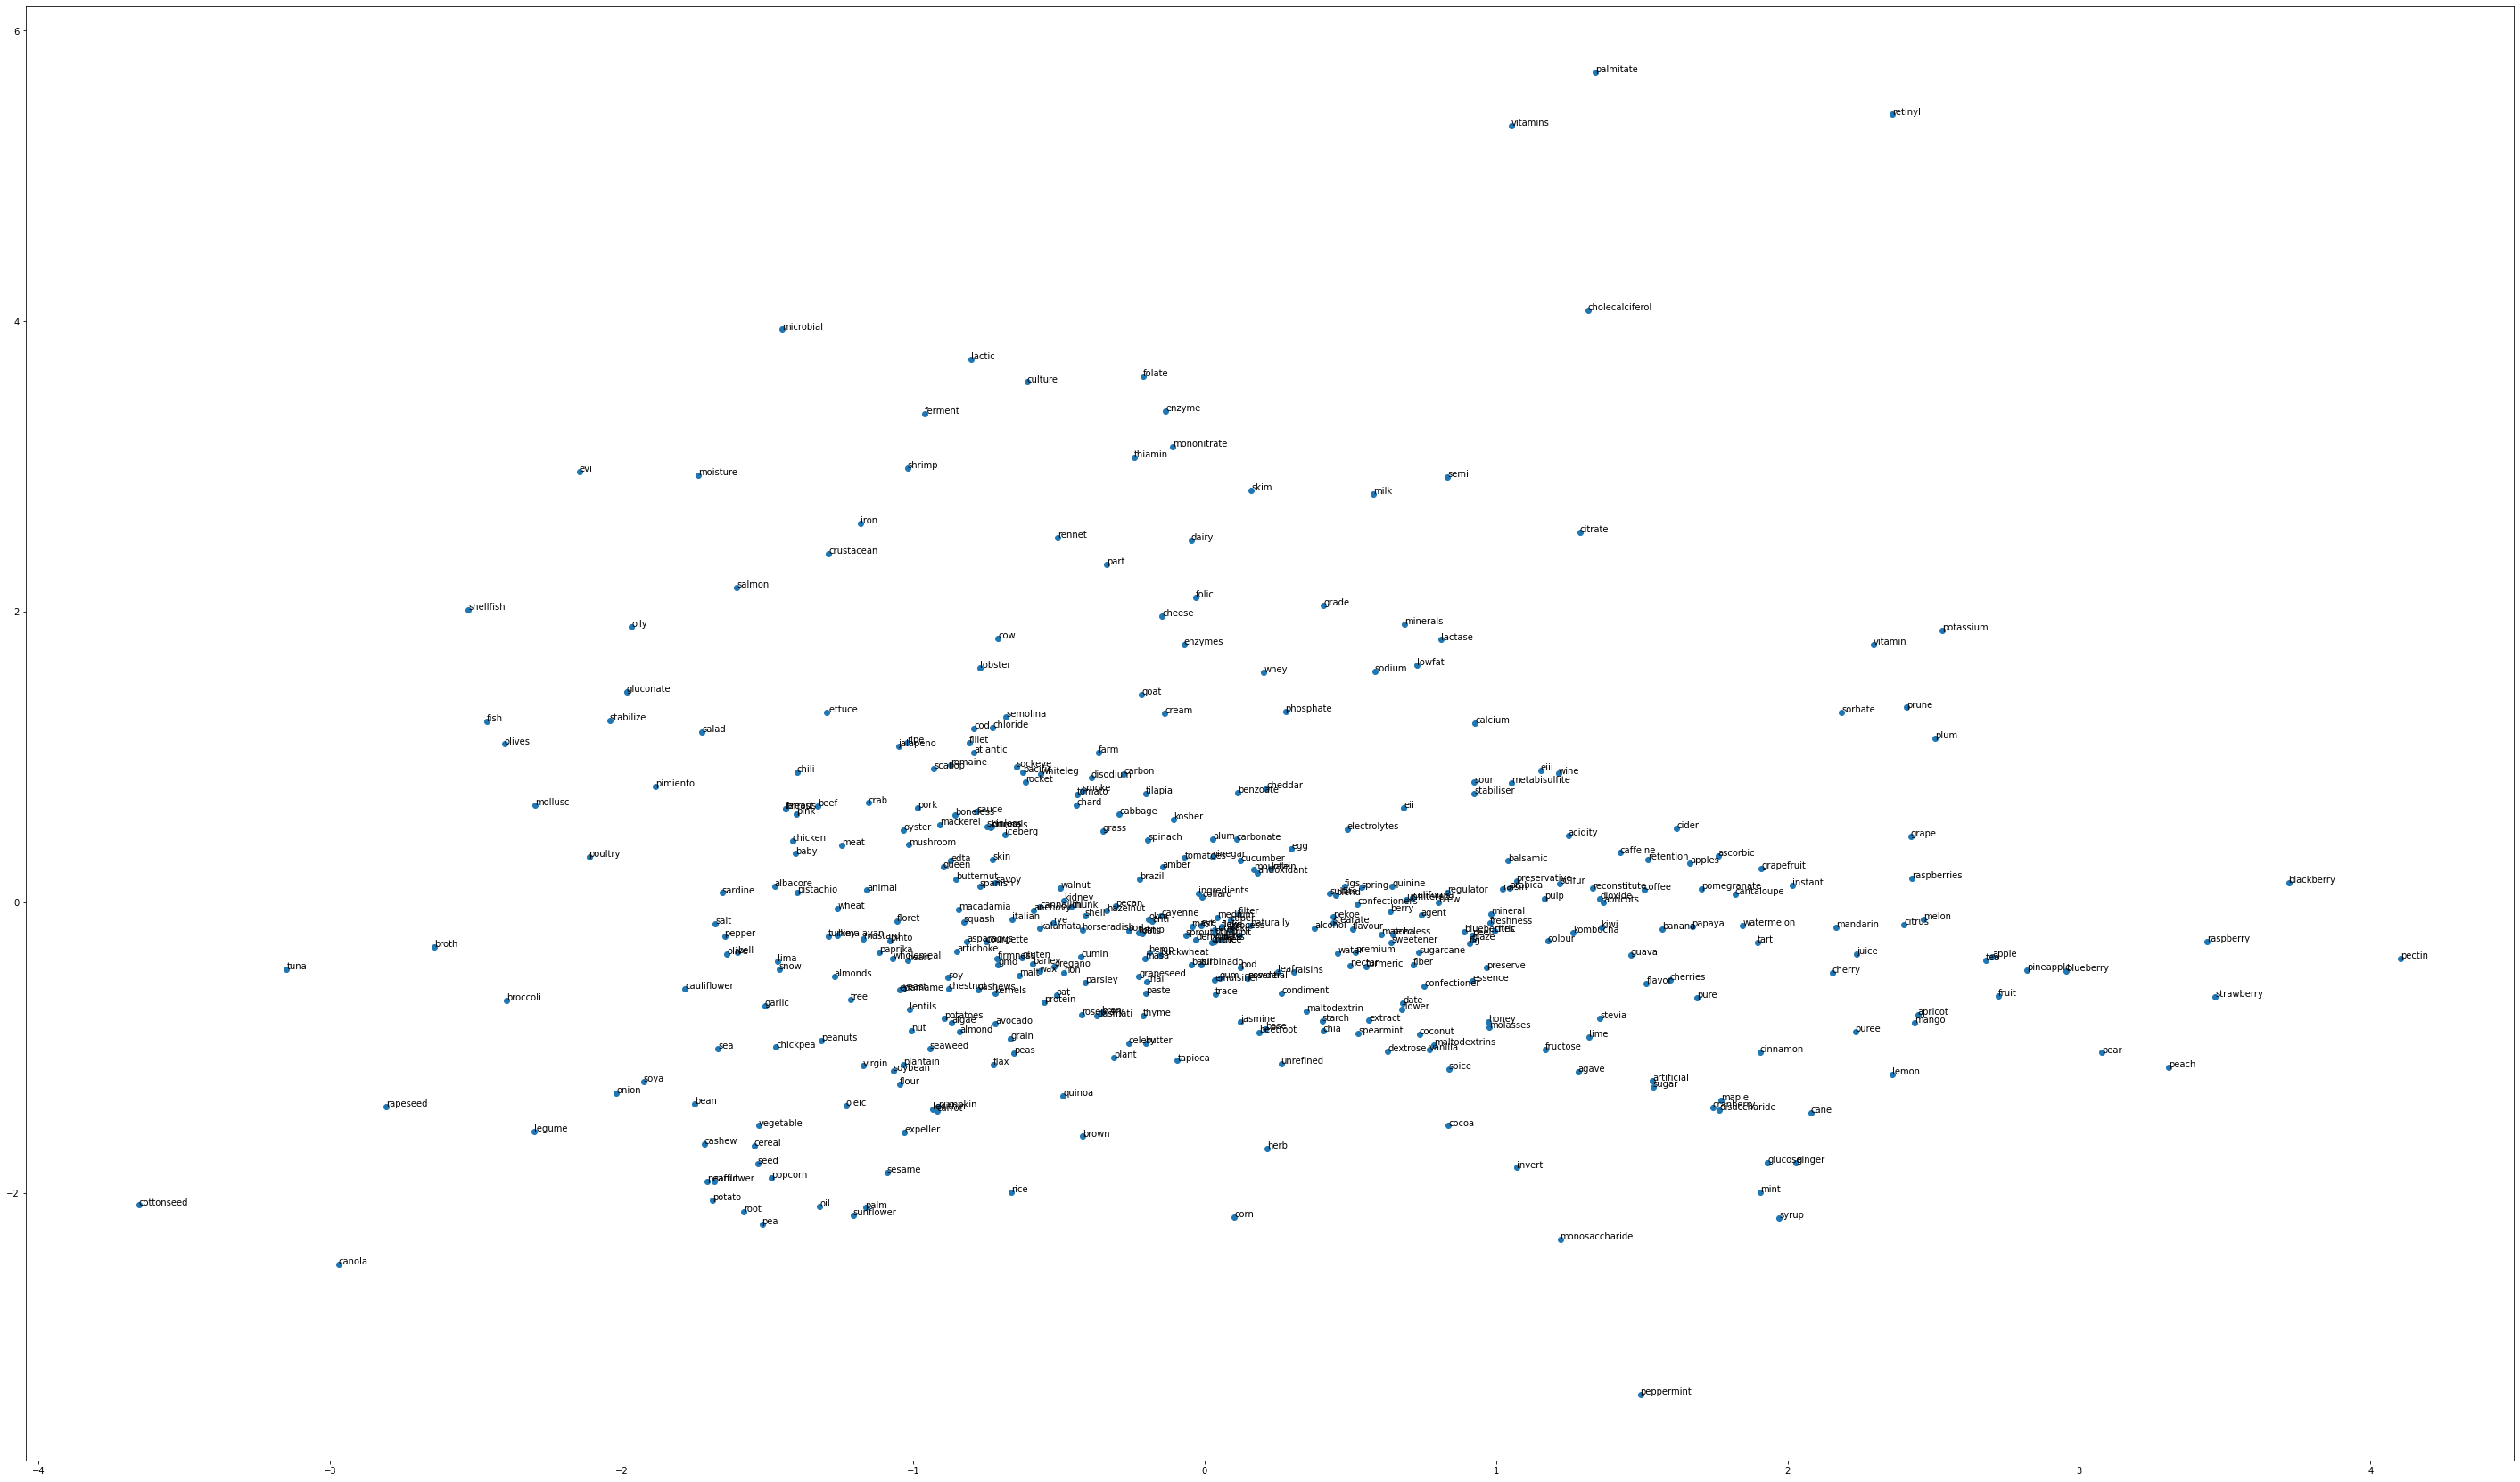

In [41]:
fig,ax = plt.subplots(figsize=(50,30))
ax.scatter(pcaDF['pca1'],pcaDF['pca2'])
for i,txt in enumerate(mots):
  ax.annotate(txt,(pcaDF['pca1'][i],pcaDF['pca2'][i]),fontsize=10)

# **PART B : SIMILARITY BETWEEN PRODUCT**

## **Creation of coordinate for each product**

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)

df_produit= df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df['ingredient_final']),
                index=df.index,
                columns=mlb.classes_))
df_produit.head(1)

index   code             product_name  \
0     55  30717  Organic Baby Lima Beans   

                         ingredients_tags    main_category  \
0   baby lima beans   legume   lima bean   en:butter-beans   

                 ingredient_tokenize            ingredient_final  acidity  \
0  [lima, bean, beans, baby, legume]  [lima, bean, baby, legume]        0   

   agave  agent  albacore  alcohol  algae  almond  almonds  alum  amber  \
0      0      0         0        0      0       0        0     0      0   

   anchovy  animal  anti  antioxidant  apple  apples  apricot  apricots  \
0        0       0     0            0      0       0        0         0   

   arabica  artichoke  artificial  ascorbic  asparagus  atlantic  avocado  \
0        0          0           0         0          0         0        0   

   baby  balsamic  banana  barley  base  basil  basmati  bean  beef  beetroot  \
0     1         0       0       0     0      0        0     1     0         0   

   bell  benzoate  berry  blackberry  blend  blueberries  blueberry  boneless  \
0     0         0      0           0      0            0          0         0   

   bran  brazil  breast  brew  broccoli  broth  brown  brussels  buckwheat  \
0     0       0       0     0         0      0      0         0          0   

   butter  butternut  cabbage  caffeine  cake  calcium  california  cane  \
0       0          0        0         0     0        0           0     0   

   cannellini  canola  cantaloupe  caper  carbon  carbonate  carrot  cashew  \
0           0       0           0      0       0          0       0       0   

   cashews  cauliflower  cayenne  celery  cereal  chard  cheddar  cheese  \
0        0            0        0       0       0      0        0       0   

   cherries  cherry  chestnut  chia  chicken  chickpea  chili  chloride  \
0         0       0         0     0        0         0      0         0   

   cholecalciferol  chunk  cider  cinnamon  citrate  citric  citrus  cocoa  \
0                0      0      0         0        0       0       0      0   

   coconut  cod  coffee  collard  colour  condiment  confectioner  \
0        0    0       0        0       0          0             0   

   confectioners  cook  corn  cottonseed  courgette  cow  crab  cranberry  \
0              0     0     0           0          0    0     0          0   

   cream  crustacean  cucumber  culture  cumin  dairy  date  dehydrate  \
0      0           0         0        0      0      0     0          0   

   dextrose  dilute  dioxide  disaccharide  disodium  durum  edamame  edta  \
0         0       0        0             0         0      0        0     0   

   egg  eii  eiii  electrolytes  emulsifier  enzyme  enzymes  essence  \
0    0    0     0             0           0       0        0        0   

   essential  evi  expeller  extract  eye  farm  ferment  ferrous  fiber  fig  \
0          0    0         0        0    0     0        0        0      0    0   

   figs  fillet  filter  firmness  fish  flake  flavor  flavour  flax  floret  \
0     0       0       0         0     0      0       0        0     0       0   

   flour  flow  flower  folate  folic  freshness  fructose  fruit  garlic  \
0      0     0       0       0      0          0         0      0       0   

   ginger  glaze  gluconate  glucose  gluten  gmo  goat  grade  grain  grape  \
0       0      0          0        0       0    0     0      0      0      0   

   grapefruit  grapeseed  grass  grind  guava  gum  hazelnut  heart  hemp  \
0           0          0      0      0      0    0         0      0     0   

   herb  himalayan  honey  horseradish  iceberg  ingredients  instant  invert  \
0     0          0      0            0        0            0        0       0   

   iron  italian  jalapeno  jasmine  juice  kalamata  kale  kernels  kidney  \
0     0        0         0        0      0         0     0        0       0   

   kiwi  kombucha  kosher  lactase  lactic  leaf  lecit

In [43]:
df_produit =df_produit.drop('code',axis=1)
df_produit =df_produit.drop('ingredients_tags',axis=1)
df_produit =df_produit.drop('ingredient_tokenize',axis=1)

In [44]:
pcaDF['coordinates'] = list(zip(pcaDF.pca1, pcaDF.pca2))
pcaDF['ingredients']=mots
pcaDF

pca1      pca2                                  coordinates  \
0   -1.464199 -0.401906   (-1.4641987085342407, -0.4019061028957367)   
1   -1.747242 -1.383719   (-1.7472418546676636, -1.3837192058563232)   
2   -1.402934  0.335706     (-1.402933955192566, 0.3357064425945282)   
3   -2.299406 -1.574974    (-2.299406051635742, -1.5749740600585938)   
4   -1.528001 -1.535420   (-1.5280011892318726, -1.5354195833206177)   
..        ...       ...                                          ...   
406  0.091307 -0.176523   (0.0913071557879448, -0.17652302980422974)   
407  0.120283 -0.227223   (0.12028278410434723, -0.2272234857082367)   
408  0.067958 -0.229257  (0.06795775890350342, -0.22925730049610138)   
409  0.024149 -0.275348  (0.024149199947714806, -0.2753482162952423)   
410  0.033579 -0.270544  (0.03357879817485809, -0.27054426074028015)   

    ingredients  
0          lima  
1          bean  
2          baby  
3        legume  
4     vegetable  
..          ...  
406     process  
407         pit  
408        mill  
409      dilute  
410       mince  

[411 rows x 4 columns]

In [45]:
dico = dict(zip(pcaDF.ingredients, pcaDF.coordinates))

In [46]:
list_ingredient = list(df_produit['ingredient_final'])

In [47]:
df_produit.head(1)

index             product_name    main_category  \
0     55  Organic Baby Lima Beans  en:butter-beans   

             ingredient_final  acidity  agave  agent  albacore  alcohol  \
0  [lima, bean, baby, legume]        0      0      0         0        0   

   algae  almond  almonds  alum  amber  anchovy  animal  anti  antioxidant  \
0      0       0        0     0      0        0       0     0            0   

   apple  apples  apricot  apricots  arabica  artichoke  artificial  ascorbic  \
0      0       0        0         0        0          0           0         0   

   asparagus  atlantic  avocado  baby  balsamic  banana  barley  base  basil  \
0          0         0        0     1         0       0       0     0      0   

   basmati  bean  beef  beetroot  bell  benzoate  berry  blackberry  blend  \
0        0     1     0         0     0         0      0           0      0   

   blueberries  blueberry  boneless  bran  brazil  breast  brew  broccoli  \
0            0          0         0     0       0       0     0         0   

   broth  brown  brussels  buckwheat  butter  butternut  cabbage  caffeine  \
0      0      0         0          0       0          0        0         0   

   cake  calcium  california  cane  cannellini  canola  cantaloupe  caper  \
0     0        0           0     0           0       0           0      0   

   carbon  carbonate  carrot  cashew  cashews  cauliflower  cayenne  celery  \
0       0          0       0       0        0            0        0       0   

   cereal  chard  cheddar  cheese  cherries  cherry  chestnut  chia  chicken  \
0       0      0        0       0         0       0         0     0        0   

   chickpea  chili  chloride  cholecalciferol  chunk  cider  cinnamon  \
0         0      0         0                0      0      0         0   

   citrate  citric  citrus  cocoa  coconut  cod  coffee  collard  colour  \
0        0       0       0      0        0    0       0        0       0   

   condiment  confectioner  confectioners  cook  corn  cottonseed  courgette  \
0          0             0              0     0     0           0          0   

   cow  crab  cranberry  cream  crustacean  cucumber  culture  cumin  dairy  \
0    0     0          0      0           0         0        0      0      0   

   date  dehydrate  dextrose  dilute  dioxide  disaccharide  disodium  durum  \
0     0          0         0       0        0             0         0      0   

   edamame  edta  egg  eii  eiii  electrolytes  emulsifier  enzyme  enzymes  \
0        0     0    0    0     0             0           0       0        0   

   essence  essential  evi  expeller  extract  eye  farm  ferment  ferrous  \
0        0          0    0         0        0    0     0        0        0   

   fiber  fig  figs  fillet  filter  firmness  fish  flake  flavor  flavour  \
0      0    0     0       0       0         0     0      0       0        0   

   flax  floret  flour  flow  flower  folate  folic  freshness  fructose  \
0     0       0      0     0       0       0      0          0         0   

   fruit  garlic  ginger  glaze  gluconate  glucose  gluten  gmo  goat  grade  \
0      0       0       0      0          0        0       0    0     0      0   

   grain  grape  grapefruit  grapeseed  grass  grind  guava  gum  hazelnut  \
0      0      0           0          0      0      0      0    0         0   

   heart  hemp  herb  himalayan  honey  horseradish  iceberg  ingredients  \
0      0     0     0          0      0            0        0            0   

   instant  invert  iron  italian  jalapeno  jasmine  juice  kalamata  kale  \
0        0       0     0        0         0        0      0         0     0   

   kernels  kidney  kiwi  kombucha  kosher  lactase  lactic  leaf  lecithin  \
0        0       0     0         0       0        0       0     0         0   

   legume  lemon  lentils  lettuce  lima  lime  lobster  lowfat  macadamia  \
0       1      0        0        0    

In [48]:
print(len(dico))
result = {x for l in list_ingredient for x in l}
print(len(mots))

411
411


In [49]:
np_array_coord_bis=[]
for x in list_ingredient:
  list_inter_bis= []
  if isinstance(x,list):
    for y in x:
      list_inter_bis.append(list(dico[y]))
  else:
       list_inter_bis.append(list(dico[x]))
  np_array_coord_bis.append(list_inter_bis)

In [50]:
np_array_coord_bis[0]

[[-1.4641987085342407, -0.4019061028957367],
 [-1.7472418546676636, -1.3837192058563232],
 [-1.402933955192566, 0.3357064425945282],
 [-2.299406051635742, -1.5749740600585938]]

In [51]:
df_produit['ingredient_coordinate'] = np_array_coord_bis
df_produit.head(1)

<ipython-input-51-10371bf4e61c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_produit['ingredient_coordinate'] = np_array_coord_bis


index             product_name    main_category  \
0     55  Organic Baby Lima Beans  en:butter-beans   

             ingredient_final  acidity  agave  agent  albacore  alcohol  \
0  [lima, bean, baby, legume]        0      0      0         0        0   

   algae  almond  almonds  alum  amber  anchovy  animal  anti  antioxidant  \
0      0       0        0     0      0        0       0     0            0   

   apple  apples  apricot  apricots  arabica  artichoke  artificial  ascorbic  \
0      0       0        0         0        0          0           0         0   

   asparagus  atlantic  avocado  baby  balsamic  banana  barley  base  basil  \
0          0         0        0     1         0       0       0     0      0   

   basmati  bean  beef  beetroot  bell  benzoate  berry  blackberry  blend  \
0        0     1     0         0     0         0      0           0      0   

   blueberries  blueberry  boneless  bran  brazil  breast  brew  broccoli  \
0            0          0         0     0       0       0     0         0   

   broth  brown  brussels  buckwheat  butter  butternut  cabbage  caffeine  \
0      0      0         0          0       0          0        0         0   

   cake  calcium  california  cane  cannellini  canola  cantaloupe  caper  \
0     0        0           0     0           0       0           0      0   

   carbon  carbonate  carrot  cashew  cashews  cauliflower  cayenne  celery  \
0       0          0       0       0        0            0        0       0   

   cereal  chard  cheddar  cheese  cherries  cherry  chestnut  chia  chicken  \
0       0      0        0       0         0       0         0     0        0   

   chickpea  chili  chloride  cholecalciferol  chunk  cider  cinnamon  \
0         0      0         0                0      0      0         0   

   citrate  citric  citrus  cocoa  coconut  cod  coffee  collard  colour  \
0        0       0       0      0        0    0       0        0       0   

   condiment  confectioner  confectioners  cook  corn  cottonseed  courgette  \
0          0             0              0     0     0           0          0   

   cow  crab  cranberry  cream  crustacean  cucumber  culture  cumin  dairy  \
0    0     0          0      0           0         0        0      0      0   

   date  dehydrate  dextrose  dilute  dioxide  disaccharide  disodium  durum  \
0     0          0         0       0        0             0         0      0   

   edamame  edta  egg  eii  eiii  electrolytes  emulsifier  enzyme  enzymes  \
0        0     0    0    0     0             0           0       0        0   

   essence  essential  evi  expeller  extract  eye  farm  ferment  ferrous  \
0        0          0    0         0        0    0     0        0        0   

   fiber  fig  figs  fillet  filter  firmness  fish  flake  flavor  flavour  \
0      0    0     0       0       0         0     0      0       0        0   

   flax  floret  flour  flow  flower  folate  folic  freshness  fructose  \
0     0       0      0     0       0       0      0          0         0   

   fruit  garlic  ginger  glaze  gluconate  glucose  gluten  gmo  goat  grade  \
0      0       0       0      0          0        0       0    0     0      0   

   grain  grape  grapefruit  grapeseed  grass  grind  guava  gum  hazelnut  \
0      0      0           0          0      0      0      0    0         0   

   heart  hemp  herb  himalayan  honey  horseradish  iceberg  ingredients  \
0      0     0     0          0      0            0        0            0   

   instant  invert  iron  italian  jalapeno  jasmine  juice  kalamata  kale  \
0        0       0     0        0         0        0      0         0     0   

   kernels  kidney  kiwi  kombucha  kosher  lactase  lactic  leaf  lecithin  \
0        0       0     0         0       0        0       0     0         0   

   legume  lemon  lentils  lettuce  lima  lime  lobster  lowfat  macadamia  \
0       1      0        0        0    

In [52]:
df_produit['moy_coord_ingredient'] = df_produit["ingredient_coordinate"].map(lambda x : np.average(x,axis=0))
df_produit.head(1)

<ipython-input-52-4876542cc355>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_produit['moy_coord_ingredient'] = df_produit["ingredient_coordinate"].map(lambda x : np.average(x,axis=0))


index             product_name    main_category  \
0     55  Organic Baby Lima Beans  en:butter-beans   

             ingredient_final  acidity  agave  agent  albacore  alcohol  \
0  [lima, bean, baby, legume]        0      0      0         0        0   

   algae  almond  almonds  alum  amber  anchovy  animal  anti  antioxidant  \
0      0       0        0     0      0        0       0     0            0   

   apple  apples  apricot  apricots  arabica  artichoke  artificial  ascorbic  \
0      0       0        0         0        0          0           0         0   

   asparagus  atlantic  avocado  baby  balsamic  banana  barley  base  basil  \
0          0         0        0     1         0       0       0     0      0   

   basmati  bean  beef  beetroot  bell  benzoate  berry  blackberry  blend  \
0        0     1     0         0     0         0      0           0      0   

   blueberries  blueberry  boneless  bran  brazil  breast  brew  broccoli  \
0            0          0         0     0       0       0     0         0   

   broth  brown  brussels  buckwheat  butter  butternut  cabbage  caffeine  \
0      0      0         0          0       0          0        0         0   

   cake  calcium  california  cane  cannellini  canola  cantaloupe  caper  \
0     0        0           0     0           0       0           0      0   

   carbon  carbonate  carrot  cashew  cashews  cauliflower  cayenne  celery  \
0       0          0       0       0        0            0        0       0   

   cereal  chard  cheddar  cheese  cherries  cherry  chestnut  chia  chicken  \
0       0      0        0       0         0       0         0     0        0   

   chickpea  chili  chloride  cholecalciferol  chunk  cider  cinnamon  \
0         0      0         0                0      0      0         0   

   citrate  citric  citrus  cocoa  coconut  cod  coffee  collard  colour  \
0        0       0       0      0        0    0       0        0       0   

   condiment  confectioner  confectioners  cook  corn  cottonseed  courgette  \
0          0             0              0     0     0           0          0   

   cow  crab  cranberry  cream  crustacean  cucumber  culture  cumin  dairy  \
0    0     0          0      0           0         0        0      0      0   

   date  dehydrate  dextrose  dilute  dioxide  disaccharide  disodium  durum  \
0     0          0         0       0        0             0         0      0   

   edamame  edta  egg  eii  eiii  electrolytes  emulsifier  enzyme  enzymes  \
0        0     0    0    0     0             0           0       0        0   

   essence  essential  evi  expeller  extract  eye  farm  ferment  ferrous  \
0        0          0    0         0        0    0     0        0        0   

   fiber  fig  figs  fillet  filter  firmness  fish  flake  flavor  flavour  \
0      0    0     0       0       0         0     0      0       0        0   

   flax  floret  flour  flow  flower  folate  folic  freshness  fructose  \
0     0       0      0     0       0       0      0          0         0   

   fruit  garlic  ginger  glaze  gluconate  glucose  gluten  gmo  goat  grade  \
0      0       0       0      0          0        0       0    0     0      0   

   grain  grape  grapefruit  grapeseed  grass  grind  guava  gum  hazelnut  \
0      0      0           0          0      0      0      0    0         0   

   heart  hemp  herb  himalayan  honey  horseradish  iceberg  ingredients  \
0      0     0     0          0      0            0        0            0   

   instant  invert  iron  italian  jalapeno  jasmine  juice  kalamata  kale  \
0        0       0     0        0         0        0      0         0     0   

   kernels  kidney  kiwi  kombucha  kosher  lactase  lactic  leaf  lecithin  \
0        0       0     0         0       0        0       0     0         0   

   legume  lemon  lentils  lettuce  lima  lime  lobster  lowfat  macadamia  \
0       1      0        0        0    

In [53]:
d= list(df_produit['moy_coord_ingredient'])
d[0]

array([-1.72844514, -0.75622323])

## **Similarity**

In [54]:
df_produit[['coord_x','coord_y']] = pd.DataFrame(df_produit.moy_coord_ingredient.tolist(), index= df_produit.index)
df_produit.head(1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


index             product_name    main_category  \
0     55  Organic Baby Lima Beans  en:butter-beans   

             ingredient_final  acidity  agave  agent  albacore  alcohol  \
0  [lima, bean, baby, legume]        0      0      0         0        0   

   algae  almond  almonds  alum  amber  anchovy  animal  anti  antioxidant  \
0      0       0        0     0      0        0       0     0            0   

   apple  apples  apricot  apricots  arabica  artichoke  artificial  ascorbic  \
0      0       0        0         0        0          0           0         0   

   asparagus  atlantic  avocado  baby  balsamic  banana  barley  base  basil  \
0          0         0        0     1         0       0       0     0      0   

   basmati  bean  beef  beetroot  bell  benzoate  berry  blackberry  blend  \
0        0     1     0         0     0         0      0           0      0   

   blueberries  blueberry  boneless  bran  brazil  breast  brew  broccoli  \
0            0          0         0     0       0       0     0         0   

   broth  brown  brussels  buckwheat  butter  butternut  cabbage  caffeine  \
0      0      0         0          0       0          0        0         0   

   cake  calcium  california  cane  cannellini  canola  cantaloupe  caper  \
0     0        0           0     0           0       0           0      0   

   carbon  carbonate  carrot  cashew  cashews  cauliflower  cayenne  celery  \
0       0          0       0       0        0            0        0       0   

   cereal  chard  cheddar  cheese  cherries  cherry  chestnut  chia  chicken  \
0       0      0        0       0         0       0         0     0        0   

   chickpea  chili  chloride  cholecalciferol  chunk  cider  cinnamon  \
0         0      0         0                0      0      0         0   

   citrate  citric  citrus  cocoa  coconut  cod  coffee  collard  colour  \
0        0       0       0      0        0    0       0        0       0   

   condiment  confectioner  confectioners  cook  corn  cottonseed  courgette  \
0          0             0              0     0     0           0          0   

   cow  crab  cranberry  cream  crustacean  cucumber  culture  cumin  dairy  \
0    0     0          0      0           0         0        0      0      0   

   date  dehydrate  dextrose  dilute  dioxide  disaccharide  disodium  durum  \
0     0          0         0       0        0             0         0      0   

   edamame  edta  egg  eii  eiii  electrolytes  emulsifier  enzyme  enzymes  \
0        0     0    0    0     0             0           0       0        0   

   essence  essential  evi  expeller  extract  eye  farm  ferment  ferrous  \
0        0          0    0         0        0    0     0        0        0   

   fiber  fig  figs  fillet  filter  firmness  fish  flake  flavor  flavour  \
0      0    0     0       0       0         0     0      0       0        0   

   flax  floret  flour  flow  flower  folate  folic  freshness  fructose  \
0     0       0      0     0       0       0      0          0         0   

   fruit  garlic  ginger  glaze  gluconate  glucose  gluten  gmo  goat  grade  \
0      0       0       0      0          0        0       0    0     0      0   

   grain  grape  grapefruit  grapeseed  grass  grind  guava  gum  hazelnut  \
0      0      0           0          0      0      0      0    0         0   

   heart  hemp  herb  himalayan  honey  horseradish  iceberg  ingredients  \
0      0     0     0          0      0            0        0            0   

   instant  invert  iron  italian  jalapeno  jasmine  juice  kalamata  kale  \
0        0       0     0        0         0        0      0         0     0   

   kernels  kidney  kiwi  kombucha  kosher  lactase  lactic  leaf  lecithin  \
0        0       0     0         0       0        0       0     0         0   

   legume  lemon  lentils  lettuce  lima  lime  lobster  lowfat  macadamia  \
0       1      0        0        0    

In [55]:
#df_produit.reset_index(inplace=True)
from sklearn.metrics.pairwise import cosine_similarity

In [56]:
prod = df_produit[['product_name']].values
coord_prod= df_produit[['coord_x','coord_y']].values

**Similarity between  ['Peanut butter'] et   ['Brown sugar']**

In [66]:
prod[98]

array(['Organic Balsamic Vinegar Of Modena'], dtype=object)

In [101]:
prod1 = prod[46]
prod2= prod[37]
coord_prod1 = coord_prod[46]
coord_prod2 = coord_prod[37]

result = cosine_similarity([coord_prod1, coord_prod2])
print('les produits:', prod1,'et ',prod2,'sont assez très differents car le cosinus similarity donne : ',result[1][0])

les produits: ['Peanut butter'] et  ['Brown sugar'] sont assez très differents car le cosinus similarity donne :  0.0007559961258660061


**Similarity between ['Peanut butter'] et   ['White cooking wine']**

In [ ]:
prod3= prod[350]
coord_prod3 = coord_prod[350]
result2 = cosine_similarity([coord_prod1, coord_prod3])
print('les produits:', prod1,'et ',prod3,'sont des produits totalement différents (vecteur opposé), car le résutlat donne : ',result2[1][0])

les produits: ['Peanut butter'] et  ['White cooking wine'] sont des produits totalement différents (vecteur opposé), car le résutlat donne :  -0.8820505000505532


**Similarty between ['Apple & Cinnamon Tea'] et   ['Natural Almonds']**

In [118]:
prod4= prod[221]
coord_prod4 = coord_prod[221]
result3 = cosine_similarity([coord_prod1, coord_prod4])
print('les produits:', prod1,'et ',prod4,'sont des produits trsès similaire (vecteur très proche), car le résutlat donne : ',result3[1][0])

les produits: ['Peanut butter'] et  ['Natural Almonds'] sont des produits trsès similaire (vecteur très proche), car le résutlat donne :  0.9966308027038537


## **Model Clustering**

**We are going to test 2 approach : one with 16 cluster and one with  200 clusters**

**1st approach**

In [119]:
d= list(df_produit['moy_coord_ingredient'])
d[0]

array([-1.72844514, -0.75622323])

In [120]:
from sklearn.cluster import KMeans
l = []
K = range(1,51,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(d)
    l.append(kmeanModel.inertia_)

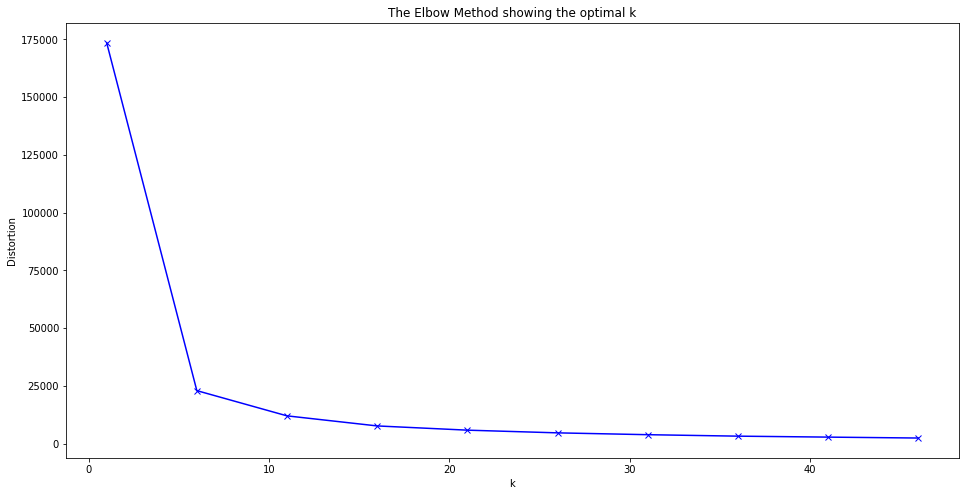

In [121]:
plt.figure(figsize=(16,8))
plt.plot(K, l, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [122]:

kmeans = KMeans(n_clusters=16)
kmeans.fit(d)
df_produit['cluster'] = kmeans.labels_
df_produit.head(1)

<ipython-input-122-0b797e037acc>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_produit['cluster'] = kmeans.labels_


index             product_name    main_category  \
0     55  Organic Baby Lima Beans  en:butter-beans   

             ingredient_final  acidity  agave  agent  albacore  alcohol  \
0  [lima, bean, baby, legume]        0      0      0         0        0   

   algae  almond  almonds  alum  amber  anchovy  animal  anti  antioxidant  \
0      0       0        0     0      0        0       0     0            0   

   apple  apples  apricot  apricots  arabica  artichoke  artificial  ascorbic  \
0      0       0        0         0        0          0           0         0   

   asparagus  atlantic  avocado  baby  balsamic  banana  barley  base  basil  \
0          0         0        0     1         0       0       0     0      0   

   basmati  bean  beef  beetroot  bell  benzoate  berry  blackberry  blend  \
0        0     1     0         0     0         0      0           0      0   

   blueberries  blueberry  boneless  bran  brazil  breast  brew  broccoli  \
0            0          0         0     0       0       0     0         0   

   broth  brown  brussels  buckwheat  butter  butternut  cabbage  caffeine  \
0      0      0         0          0       0          0        0         0   

   cake  calcium  california  cane  cannellini  canola  cantaloupe  caper  \
0     0        0           0     0           0       0           0      0   

   carbon  carbonate  carrot  cashew  cashews  cauliflower  cayenne  celery  \
0       0          0       0       0        0            0        0       0   

   cereal  chard  cheddar  cheese  cherries  cherry  chestnut  chia  chicken  \
0       0      0        0       0         0       0         0     0        0   

   chickpea  chili  chloride  cholecalciferol  chunk  cider  cinnamon  \
0         0      0         0                0      0      0         0   

   citrate  citric  citrus  cocoa  coconut  cod  coffee  collard  colour  \
0        0       0       0      0        0    0       0        0       0   

   condiment  confectioner  confectioners  cook  corn  cottonseed  courgette  \
0          0             0              0     0     0           0          0   

   cow  crab  cranberry  cream  crustacean  cucumber  culture  cumin  dairy  \
0    0     0          0      0           0         0        0      0      0   

   date  dehydrate  dextrose  dilute  dioxide  disaccharide  disodium  durum  \
0     0          0         0       0        0             0         0      0   

   edamame  edta  egg  eii  eiii  electrolytes  emulsifier  enzyme  enzymes  \
0        0     0    0    0     0             0           0       0        0   

   essence  essential  evi  expeller  extract  eye  farm  ferment  ferrous  \
0        0          0    0         0        0    0     0        0        0   

   fiber  fig  figs  fillet  filter  firmness  fish  flake  flavor  flavour  \
0      0    0     0       0       0         0     0      0       0        0   

   flax  floret  flour  flow  flower  folate  folic  freshness  fructose  \
0     0       0      0     0       0       0      0          0         0   

   fruit  garlic  ginger  glaze  gluconate  glucose  gluten  gmo  goat  grade  \
0      0       0       0      0          0        0       0    0     0      0   

   grain  grape  grapefruit  grapeseed  grass  grind  guava  gum  hazelnut  \
0      0      0           0          0      0      0      0    0         0   

   heart  hemp  herb  himalayan  honey  horseradish  iceberg  ingredients  \
0      0     0     0          0      0            0        0            0   

   instant  invert  iron  italian  jalapeno  jasmine  juice  kalamata  kale  \
0        0       0     0        0         0        0      0         0     0   

   kernels  kidney  kiwi  kombucha  kosher  lactase  lactic  leaf  lecithin  \
0        0       0     0         0       0        0       0     0         0   

   legume  lemon  lentils  lettuce  lima  lime  lobster  lowfat  macadamia  \
0       1      0        0        0    

**2nd approach**

In [123]:
df_produit['main_category'] = [x.split(',')[0] for x in df_produit['main_category']]
df_produit['main_category'] = [re.sub('\w{2}:', '', x) for x in df_produit['main_category']]

In [124]:
df_produit['main_category'] = df_produit['main_category'].map(lambda x : str(x).lower())
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub("\d+", "", x))
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub(r'[!]', '', x))
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub(r'[•]', '', x))
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub(r'[/]', '', x))
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub(r'[[]', '', x))
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub(r'[]]', '', x))
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub(r'[?]', '', x))
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub(r'[-]', ' ', x))
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub(r'[,]', '', x))
df_produit['main_category'] = df_produit['main_category'].map(lambda x :re.sub(r"[']", ' ', x))

In [125]:
df_produit['main_category'].unique()

array(['butter beans', 'cranberries', 'tea bags', ..., 'chia',
       'canned pineapples', 'atuns em conserva'], dtype=object)

In [126]:
len(df_produit['main_category'].unique())

1136

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_produit['main_category_num'] = le.fit_transform(df_produit.main_category.values)

<ipython-input-127-e367f9caec65>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_produit['main_category_num'] = le.fit_transform(df_produit.main_category.values)


In [128]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=200)
kmeans2.fit(d)
df_produit['cluster200'] = kmeans2.labels_
df_produit.head(1)

<ipython-input-128-da29a0d71373>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_produit['cluster200'] = kmeans2.labels_


index             product_name main_category            ingredient_final  \
0     55  Organic Baby Lima Beans  butter beans  [lima, bean, baby, legume]   

   acidity  agave  agent  albacore  alcohol  algae  almond  almonds  alum  \
0        0      0      0         0        0      0       0        0     0   

   amber  anchovy  animal  anti  antioxidant  apple  apples  apricot  \
0      0        0       0     0            0      0       0        0   

   apricots  arabica  artichoke  artificial  ascorbic  asparagus  atlantic  \
0         0        0          0           0         0          0         0   

   avocado  baby  balsamic  banana  barley  base  basil  basmati  bean  beef  \
0        0     1         0       0       0     0      0        0     1     0   

   beetroot  bell  benzoate  berry  blackberry  blend  blueberries  blueberry  \
0         0     0         0      0           0      0            0          0   

   boneless  bran  brazil  breast  brew  broccoli  broth  brown  brussels  \
0         0     0       0       0     0         0      0      0         0   

   buckwheat  butter  butternut  cabbage  caffeine  cake  calcium  california  \
0          0       0          0        0         0     0        0           0   

   cane  cannellini  canola  cantaloupe  caper  carbon  carbonate  carrot  \
0     0           0       0           0      0       0          0       0   

   cashew  cashews  cauliflower  cayenne  celery  cereal  chard  cheddar  \
0       0        0            0        0       0       0      0        0   

   cheese  cherries  cherry  chestnut  chia  chicken  chickpea  chili  \
0       0         0       0         0     0        0         0      0   

   chloride  cholecalciferol  chunk  cider  cinnamon  citrate  citric  citrus  \
0         0                0      0      0         0        0       0       0   

   cocoa  coconut  cod  coffee  collard  colour  condiment  confectioner  \
0      0        0    0       0        0       0          0             0   

   confectioners  cook  corn  cottonseed  courgette  cow  crab  cranberry  \
0              0     0     0           0          0    0     0          0   

   cream  crustacean  cucumber  culture  cumin  dairy  date  dehydrate  \
0      0           0         0        0      0      0     0          0   

   dextrose  dilute  dioxide  disaccharide  disodium  durum  edamame  edta  \
0         0       0        0             0         0      0        0     0   

   egg  eii  eiii  electrolytes  emulsifier  enzyme  enzymes  essence  \
0    0    0     0             0           0       0        0        0   

   essential  evi  expeller  extract  eye  farm  ferment  ferrous  fiber  fig  \
0          0    0         0        0    0     0        0        0      0    0   

   figs  fillet  filter  firmness  fish  flake  flavor  flavour  flax  floret  \
0     0       0       0         0     0      0       0        0     0       0   

   flour  flow  flower  folate  folic  freshness  fructose  fruit  garlic  \
0      0     0       0       0      0          0         0      0       0   

   ginger  glaze  gluconate  glucose  gluten  gmo  goat  grade  grain  grape  \
0       0      0          0        0       0    0     0      0      0      0   

   grapefruit  grapeseed  grass  grind  guava  gum  hazelnut  heart  hemp  \
0           0          0      0      0      0    0         0      0     0   

   herb  himalayan  honey  horseradish  iceberg  ingredients  instant  invert  \
0     0          0      0            0        0            0        0       0   

   iron  italian  jalapeno  jasmine  juice  kalamata  kale  kernels  kidney  \
0     0        0         0        0      0         0     0        0       0   

   kiwi  kombucha  kosher  lactase  lactic  leaf  lecithin  legume  lemon  \
0     0         0       0        0       0     0         0       1      0   

   lentils  lettuce  lima  lime  lobster  lowfat  macadamia  mackerel  malt  \
0        0   

# **PART C : MAP OF PRODUCT**

**1. plot of the 1st Kmeans (k=16)**

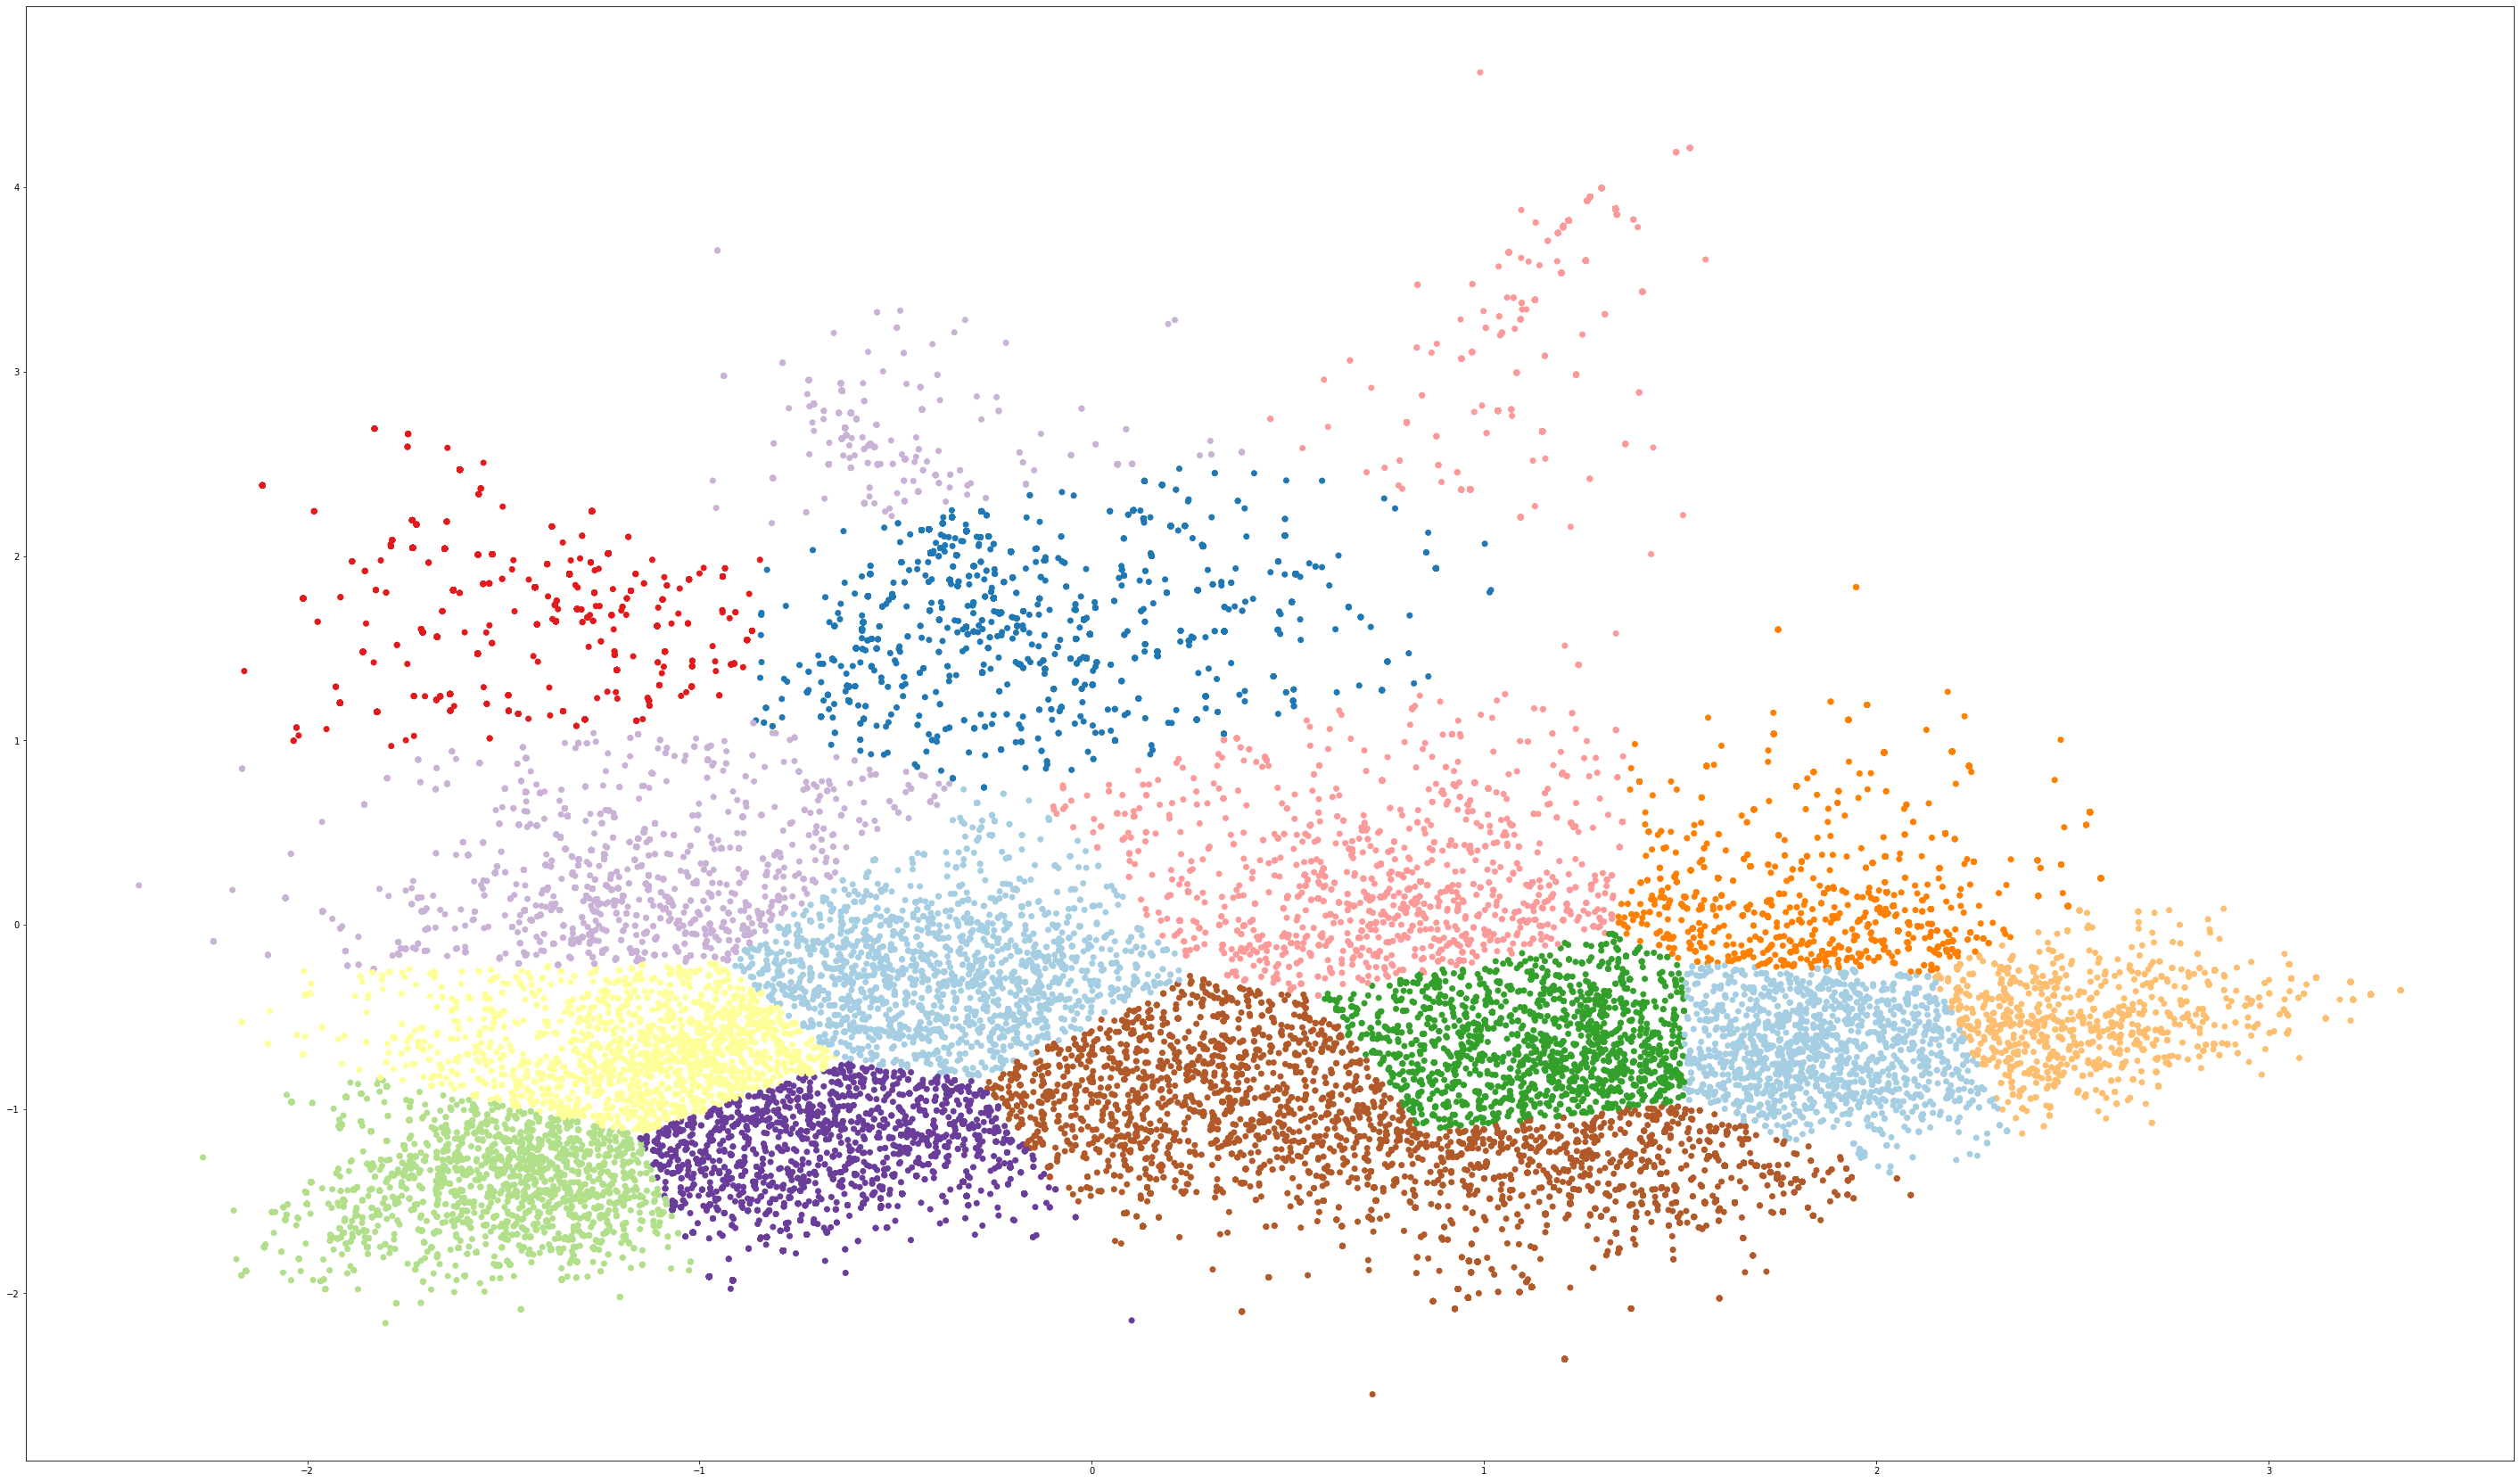

In [129]:
fig,ax = plt.subplots(figsize=(50,30))
ax.scatter(df_produit['coord_x'],df_produit['coord_y'],c=df_produit['cluster'],cmap=plt.cm.Paired)

**Liste of the 15 first product of each cluster**

In [130]:
clustering = df_produit[['product_name','cluster']].copy()
clustering.head(1)

product_name  cluster
0  Organic Baby Lima Beans       13

In [131]:
def print_top_15(df, col):
    res = df[col].head(15)
    for el in res:
        print(f'    - {el}')

In [132]:
len(clustering[clustering['cluster'] == 3]['product_name'].unique())

4249

In [133]:
for i in range(16):
    categ = clustering[clustering['cluster'] == i]
    categ = categ.sample(frac=1)
    print(f'15 Produit du cluster {i} :\n')
    print_top_15(categ,'product_name')
    print()

15 Produit du cluster 0 :

    - Kosher dill spear pickles
    - New england cranberry, pepper jelly, hot
    - Fish sauce
    - Sweet butter
    - Dragonfly, peeled straw mushrooms
    - Pepper rings
    - Black beans
    - Italian sausage
    - Roasted Piquillo Peppers In Water
    - Old Fashioned Sauerkraut
    - Authentic italian pasta
    - No salt added whole peeled tomatoes
    - Usda organic grass fed ghee
    - Whey Protein
    - Capers super nonpareilles

15 Produit du cluster 1 :

    - Fruity go, apple cinnamon applesauce, apple cinnamon
    - 100% juice blend
    - Pineapple chunks in heavy syrup
    - Mandarin Oranges In Pear Juice From Concentrate
    - Pineapple tidbits
    - Atlas Natura, Premium Nectar, Mango
    - Natural Apricot + Hazelnuts Tapas
    - Luzona, Juice Drink, Calamansi
    - Dried Jackfruit
    - Ripe Craft Juice, Cranberry Northeast Blend
    - Strawberry italian sparkling mineral water with organic flavors, strawberry
    - Lite Peach Tea
    - Juice

**plot of one cluster**

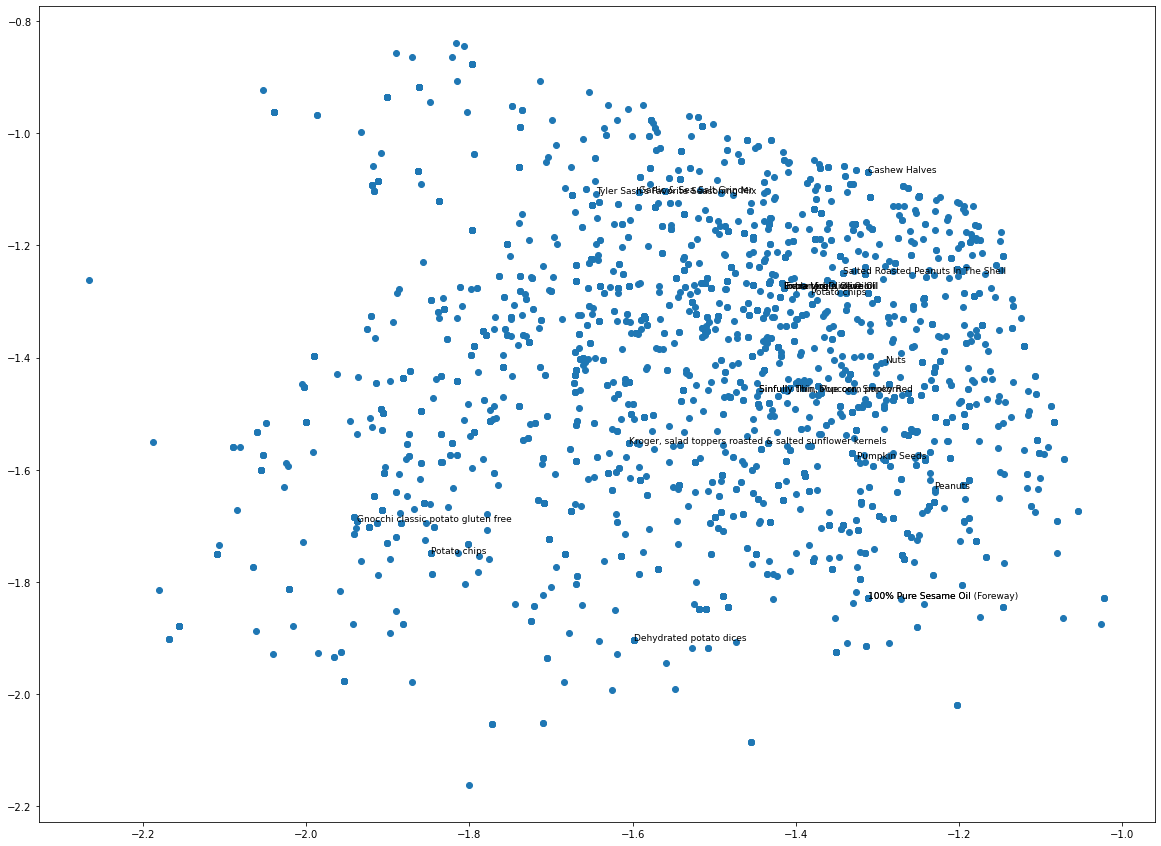

In [134]:
cluster2 = df_produit[df_produit['cluster']==3]
fig,ax = plt.subplots(figsize=(20,15))
ax.scatter(cluster2['coord_x'],cluster2['coord_y'])
for i,txt in enumerate(cluster2['product_name'][0:20]):
  ax.annotate(txt,(cluster2['coord_x'].iloc[i],cluster2['coord_y'].iloc[i]),fontsize=9)

**2. plot of the 200 cluster**

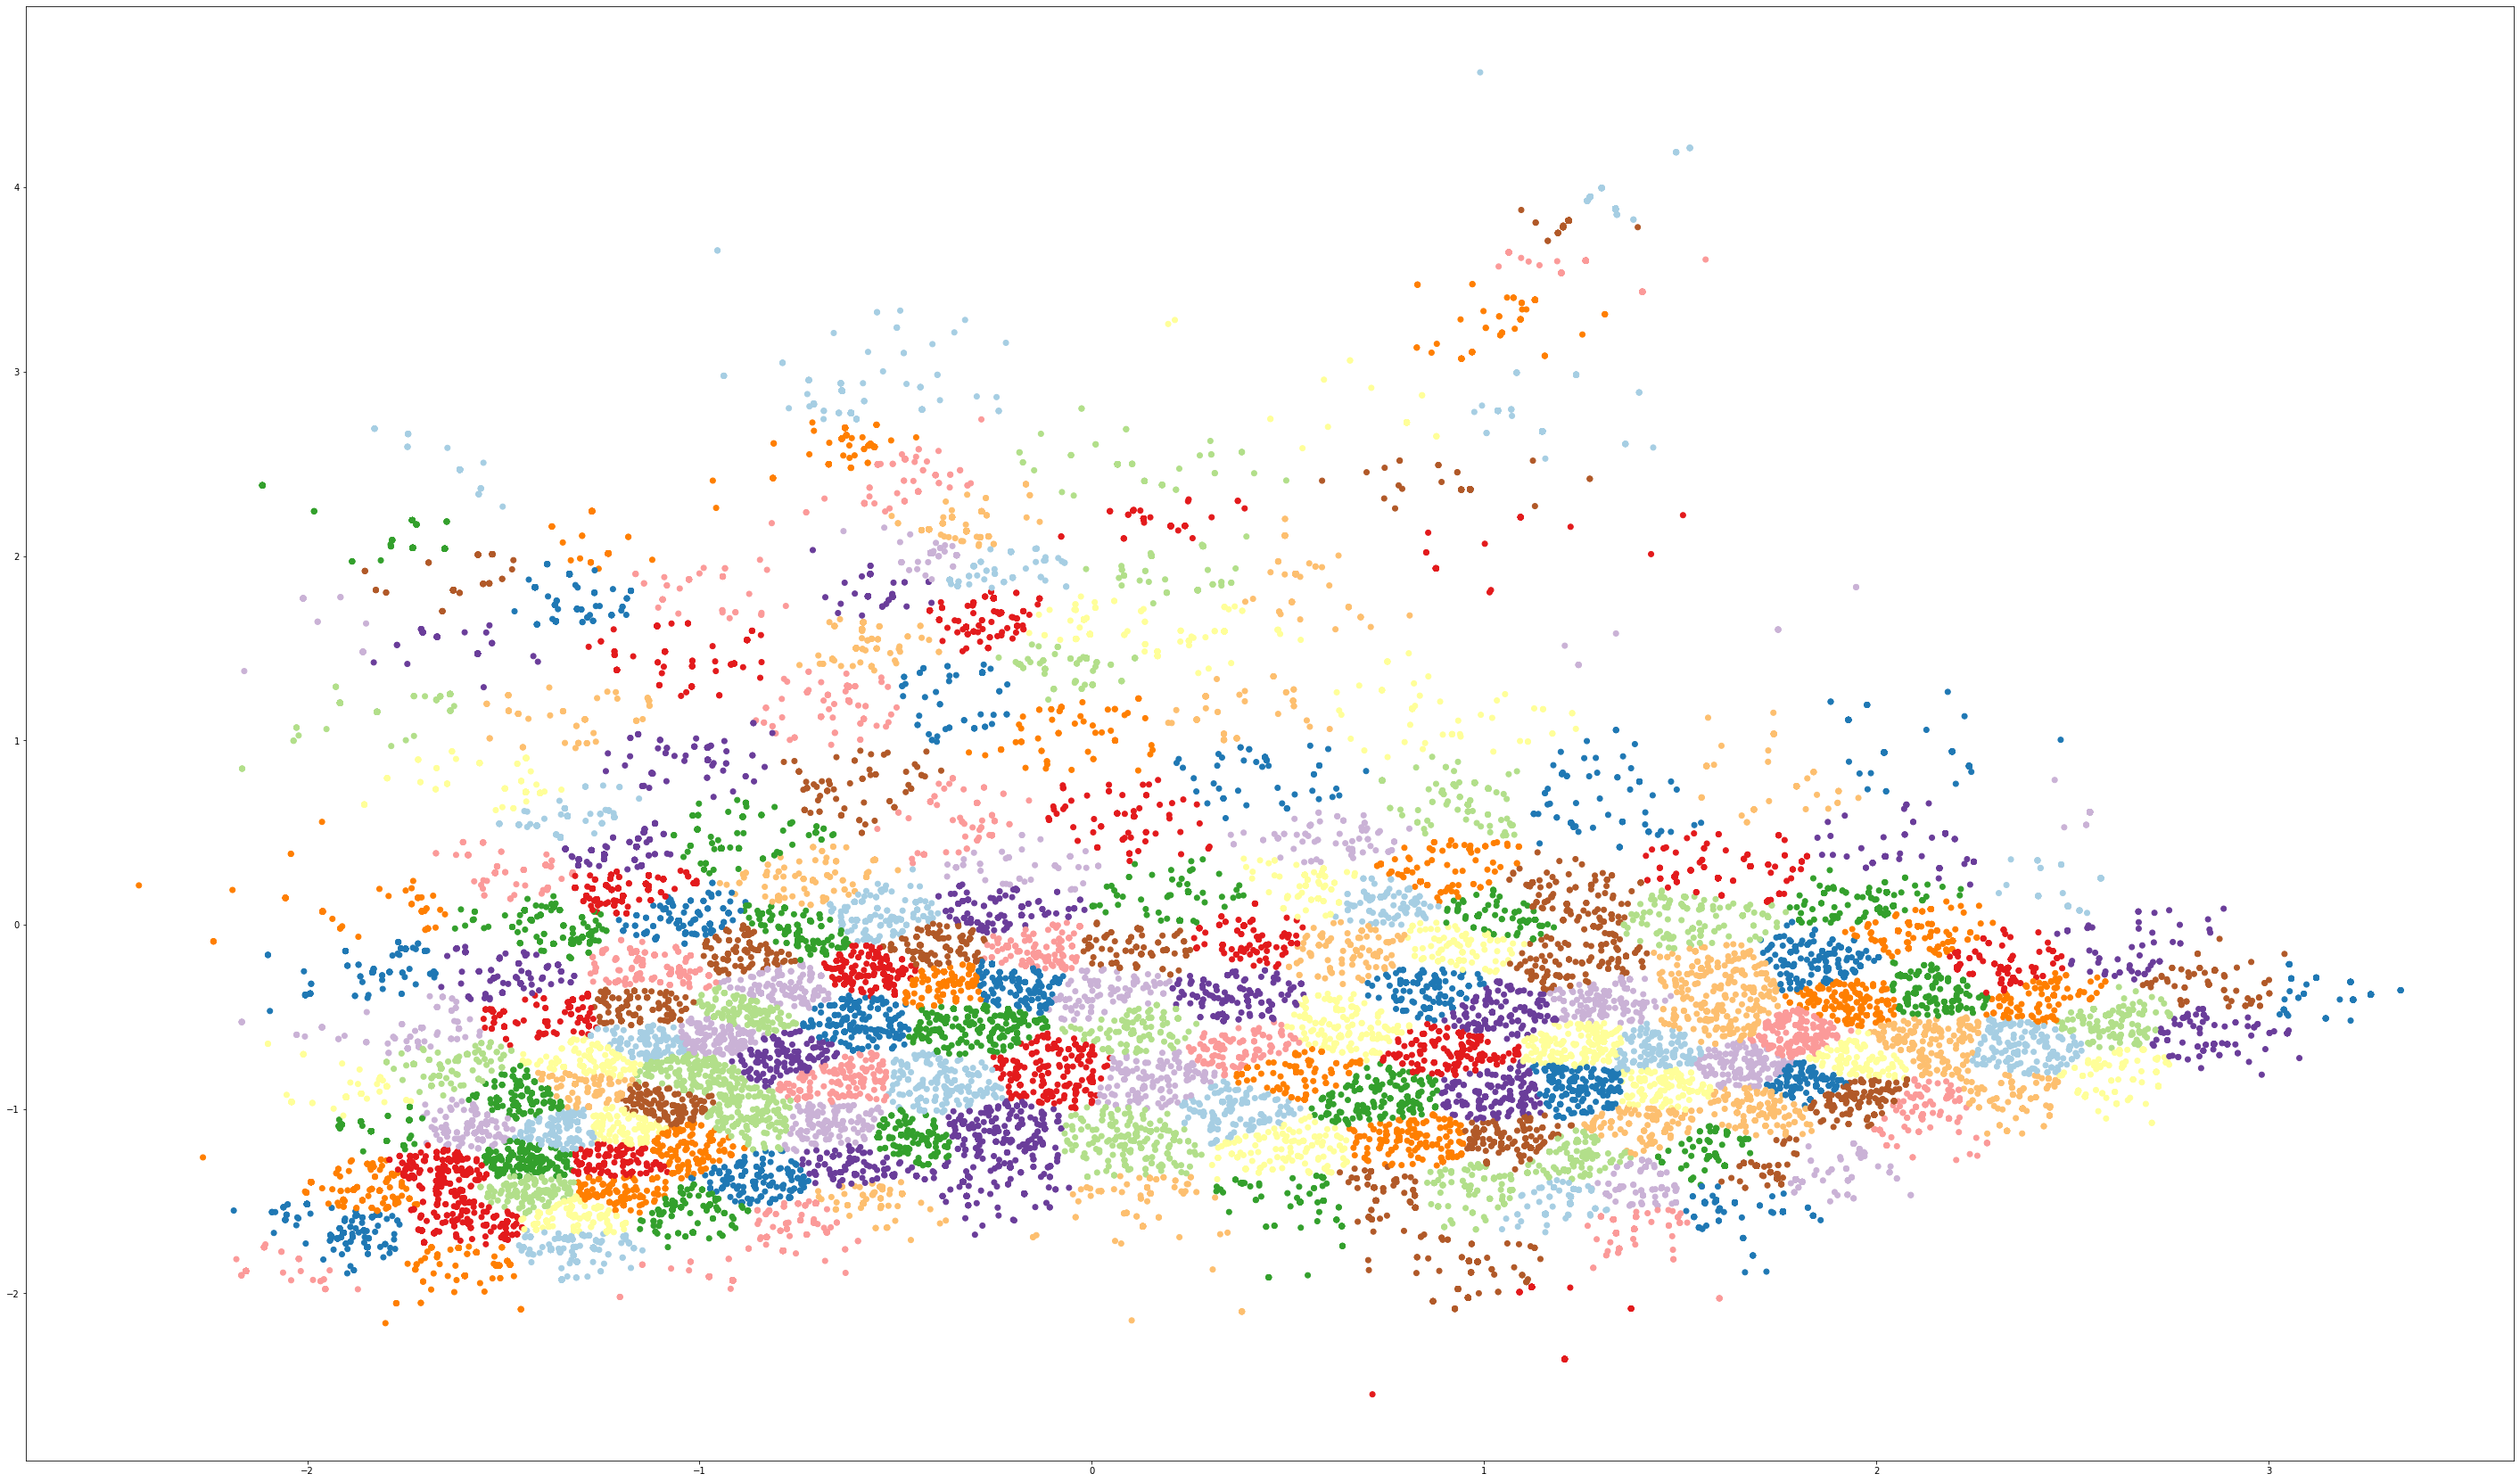

In [135]:
fig,ax = plt.subplots(figsize=(50,30))
ax.scatter(df_produit['coord_x'],df_produit['coord_y'],c=df_produit['cluster200'],cmap=plt.cm.Paired)

**Focus on a specific cluster for the 2nd means**

In [136]:
#2nd kmeans
cluster180 = df_produit[df_produit['cluster200']==180]
cluster180.shape

(139, 422)

In [137]:
liste_categories_cluster180 = list(cluster180["main_category"].unique())
print(liste_categories_cluster180)

['fruit and vegetable preserves', 'jams', 'fruit spreads', 'concentrated multifruit juices', 'strawberry jams', 'snacks', 'confectioneries', 'dehydrated beverages', 'orange marmalades', 'baking decorations', 'raspberry jams', 'plant based beverages', 'squeezed juices', 'applesauces']


**plot of cluster 180**

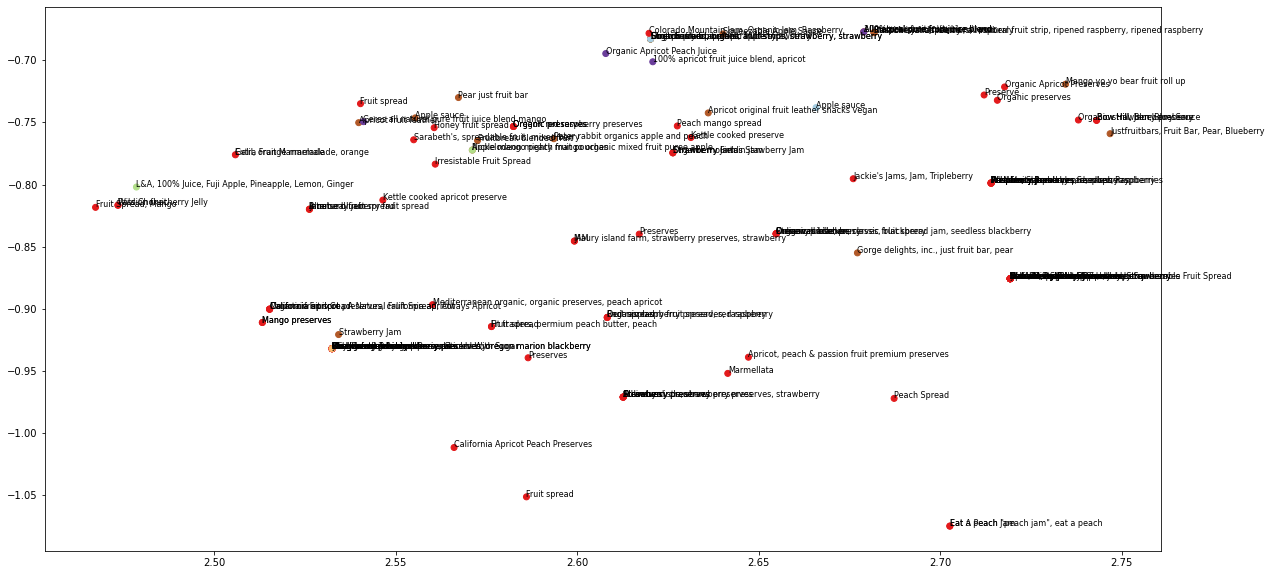

In [138]:
fig,ax = plt.subplots(figsize=(20,10))
plot = ax.scatter(cluster180['coord_x'],cluster180['coord_y'],c=cluster180['main_category_num'],cmap=plt.cm.Paired)
#ax.legend(plot)
for i,txt in enumerate(cluster180['product_name']):
    ax.annotate(txt,(cluster180['coord_x'].iloc[i],cluster180['coord_y'].iloc[i]),fontsize=8)

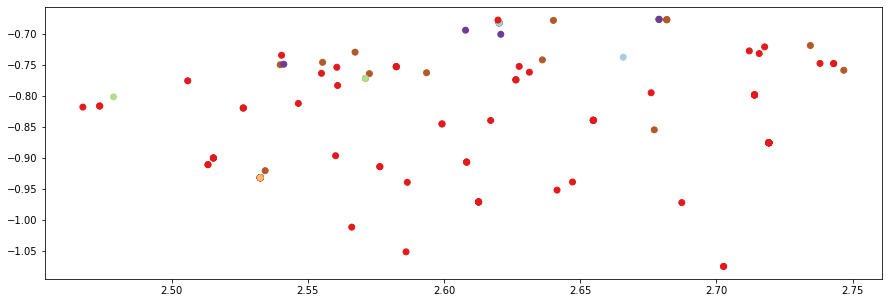

In [139]:
fig,ax = plt.subplots(figsize=(15,5))
plot = ax.scatter(cluster180['coord_x'],cluster180['coord_y'],c=cluster180['main_category_num'],cmap=plt.cm.Paired)
#ax.legend(plot)

**plot of  cluster 180 with categorie**

In [140]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique),bbox_to_anchor=(1.1, 1.05))

In [141]:

liste_categories_cluster180 = list(cluster180["main_category"].unique())
len(liste_categories_cluster180)

14

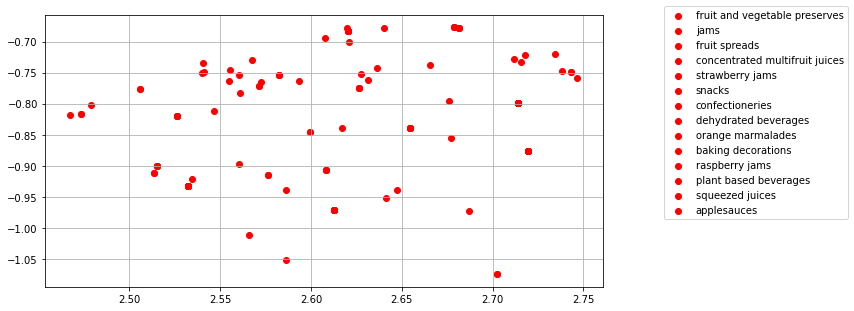

In [142]:
fig,ax = plt.subplots(figsize=(10,5))
color="red"
for i in range(cluster180.shape[0]):
    value = cluster180['main_category'].iloc[i]
    if cluster180['main_category_num'].iloc[i]==441:
        color = "blue"
    if cluster180['main_category_num'].iloc[i]==720:
        color = "red"
    if cluster180['main_category_num'].iloc[i]==969:
        color = "black"
    if cluster180['main_category_num'].iloc[i]==871:
        color = "yellow"
    if cluster180['main_category_num'].iloc[i]==3:
        color = "green"
    if cluster180['main_category_num'].iloc[i]==1124:
        color = "orange"
    if cluster180['main_category_num'].iloc[i]==915:
        color = "pink"
    if cluster180['main_category_num'].iloc[i]==1092:
        color = "purple"
    if cluster180['main_category_num'].iloc[i]==937:
        color = "beige"
    if cluster180['main_category_num'].iloc[i]==1031:
        color = "lightsalmon"
    if cluster180['main_category_num'].iloc[i]==343:
        color = "cyan"
    if cluster180['main_category_num'].iloc[i]==567:
        color = "lavender"
    if cluster180['main_category_num'].iloc[i]==890:
        color = "gold"
    if cluster180['main_category_num'].iloc[i]==751:
        color = "olive"
    if cluster180['main_category_num'].iloc[i]==869:
        color = "turquoise"
    if cluster180['main_category_num'].iloc[i]==250:
        color = "navy"
    if cluster180['main_category_num'].iloc[i]==696:
        color = "grey"
    ax.scatter(cluster180['coord_x'].iloc[i],cluster180['coord_y'].iloc[i],c=color,label=value)
legend_without_duplicate_labels(ax)
ax.grid(True)

plt.show()

**In cluster 180 there are 81 products and 17 different categories. All the categories are linked to fruits or beverages (juice,iced tea) and they are close to each other in the graph. It seems like a nice linked cluster but maybe too small because we miss a lot of fruits and beverages**

In [143]:
clustering200 = df_produit[['product_name','cluster200']].copy()
clustering200.head(1)

product_name  cluster200
0  Organic Baby Lima Beans          44

In [144]:
categ200 = clustering200[clustering200['cluster200'] == 180]
categ200 = categ200.sample(frac=1)
print(f'15 Produit du cluster {180} :\n')
print_top_15(categ200,'product_name')
print()

15 Produit du cluster 180 :

    - Ht traders, permium peach butter, peach
    - Strawberry Jam
    - Spread
    - Apricot original fruit leather snacks vegan
    - California apricot preserves, california apricot
    - Passion fruit
    - Strawberry preserves
    - Squeezable Apple Sauce
    - Preserves
    - All natural pure fruit juice blend
    - Oregon marion blackberry, blackberry
    - Prickly fruit jam
    - Organic preserves
    - Jam
    - Galil, Mixed Berry Preserve



# **Word cloud**

**ingredient word cloud**

In [145]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [146]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [147]:
df_produit['ingredient_final_str'] = [','.join(map(str, l)) for l in df_produit['ingredient_final']]

<ipython-input-147-87c7872c3815>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_produit['ingredient_final_str'] = [','.join(map(str, l)) for l in df_produit['ingredient_final']]


In [148]:
ingredient_list=df_produit['ingredient_final_str'].to_list()
ingredient_list = ' '.join(ingredient_list).lower()

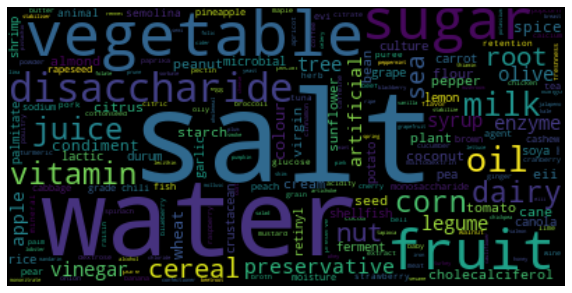

In [149]:
lemmatizer = WordNetLemmatizer()
res=word_tokenize(ingredient_list)
res=[lemmatizer.lemmatize(word) for word in res]
res=' '.join(res).lower()

wordcloud = WordCloud(collocations=False).generate(res)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

**product word cloud**

In [150]:
category_list=df_produit['main_category'].to_list()
category_list = ' '.join(category_list).lower()

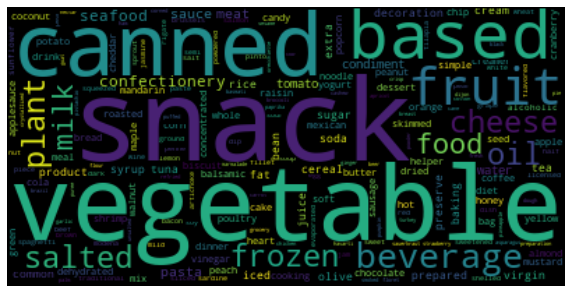

In [151]:
lemmatizer = WordNetLemmatizer()
res=word_tokenize(category_list)
res=[lemmatizer.lemmatize(word) for word in res]
res=' '.join(res).lower()

wordcloud = WordCloud(collocations=False).generate(res)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

**export to html**

In [152]:
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/Projet1NLP_Charlie_Suvin.ipynb

[NbConvertApp] Converting notebook ///content/drive/MyDrive/Projet1NLP_Charlie_Suvin.ipynb to html
[NbConvertApp] Writing 4490884 bytes to ///content/drive/MyDrive/Projet1NLP_Charlie_Suvin.html
